<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Standardized Test Analysis

--- 
# Part 1
---

### Problem Statement

The state of California has many school districts, with varying ACT and SAT performances. In order to improve the performances in these standardized tests, it is often not enough to just increase funding and resources to districts with poorer performances without identifying the underlying reasons behind the poor results.

This project aims to analyse the student performances on SAT and ACT tests with regards to a number of socio-economic indicators of each district. This helps to identify underlying factors which contributes to potential poor performances so that the state can take a more targeted approach in allocating funds and resources, as well as recommending interventions in areas of concern. 

- **Role taken on: Adviser for the state education budgeting office**
- **Target audience: Officials of the budgeting office**

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

### The California Education System

Despite being the technological powerhouse of United States and the 5th highest state in terms of GDP per capita, California seems to underperform when it comes to quality of pre-tertiary education. It ranks 40th in the quality of pre-K12<sup>1</sup> education ([Source](https://www.usnews.com/news/best-states/rankings/education)) and 41th in quality of public schools ([Source](https://wallethub.com/edu/e/states-with-the-best-schools/5335)). This is not for the lack of education resources either, as the state ranks 20th in terms of education spending([Source](https://wallethub.com/edu/e/states-with-the-best-schools/5335)). There is therefore an inefficient utilisation of education spendings and an urgency to take a more targeted approach in terms of where and how the money is spent.

 ![Education Quality vs Spending](../assets/edu_vs_spending.jpg)


<div align="center">
    <a href="https://wallethub.com/edu/e/states-with-the-best-schools/5335">Source</a>
 </div>

### A little on SAT and ACT

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Although the Covid-19 pandemic have promopted some US universities to make ACT or SAT non-mandatory for the 2020 admission cycle, they are making a comeback as normality resumes. 

Going to a college is still an important engine for social mobility in the US, and going to a university is still correlated with higher earnings [Source](https://www.northeastern.edu/bachelors-completion/news/average-salary-by-education-level/). Given this, ACT and SAT are still important benchmarks for the education system.

### Datasets

To fulfill the objective of our analysis, we will use the following datasets:

**Datasets provided as part of project**
* [`act_2019_ca.csv`](../data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](../data/sat_2019_ca.csv): 2019 SAT Scores in California by School

**Datasets from other sources**
* [`california_school_district_info.csv`](../data/california_school_district_info.csv): 2018-2019 California School District information such as NCES ID (For referencing school districts on the NCES database), homelessness, dropout, suspension and other demographic/academic info
* [`california_school_district_NCES_info.csv`](../data/california_school_district_NCES_info.csv): additional socio-economic-demographic information about California school districts obtained from National Center for Education Statisitcs(NCES) database 
    * See the notebook for obtaining the data here: [`additional_data_scraping.ipynb`](./additional_data_scraping.ipynb)
    
    * You can view a  sample of a district data page on NCES: [Link](https://nces.ed.gov/Programs/Edge/ACSDashboard/0622710) 

### Useful Functions
1. Manually calculate mean:

In [285]:
# Code:
# calculate mean by dividing sum of the numbers of a list by the length of the list
def calculate_mean(nums):
    return sum(nums)/len(nums)

In [286]:
calculate_mean([1,2,3])

2.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

In [287]:
# Code:
# Calculate standard deviation using the formula
def standard_deviation(nums):
    mean = calculate_mean(nums)
    return (sum([(x-mean)**2 for x in nums])/len(nums))**(1/2)

In [288]:
standard_deviation([1,2,3])

0.816496580927726

3. Data cleaning function:
    
    A function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!


In [289]:
# Code: Function to convert percent to decimal approximation of the percent
def decimal_approximation(percentage):
    return float(percentage.replace("%", ""))/100 if type(percentage) == str else percentage/100

In [290]:
print(decimal_approximation("12.23%"))
print(decimal_approximation(12.23))
print(decimal_approximation(12))

0.1223
0.1223
0.12


--- 
# Part 2
---

*All libraries used to be added here*

In [291]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd

warnings.filterwarnings('ignore')
sns.set_theme(style = 'white')

## Data Import and Cleaning

### For provided datasets (ACT and SAT datasets)

#### Display the provided data

In [292]:
# First, we will read the ACT and SAT results for schools in California
ACT_df = pd.read_csv("../data/act_2019_ca.csv")
SAT_df = pd.read_csv("../data/sat_2019_ca.csv")

In [293]:
# View first few rows for ACT
print(ACT_df.shape)
ACT_df.head()

(2309, 17)


CDS  CCode   CDCode      SCode RType  \
0  3.366990e+13     33  3366993   129882.0     S   
1  1.964210e+13     19  1964212  1995596.0     S   
2  1.563780e+13     15  1563776  1530377.0     S   
3  4.369670e+13     43  4369666  4333795.0     S   
4  1.964730e+13     19  1964733  1935121.0     S   

                             SName                  DName        CName  \
0  21st Century Learning Institute       Beaumont Unified    Riverside   
1      ABC Secondary (Alternative)            ABC Unified  Los Angeles   
2      Abraham Lincoln Alternative  Southern Kern Unified         Kern   
3             Abraham Lincoln High       San Jose Unified  Santa Clara   
4      Abraham Lincoln Senior High    Los Angeles Unified  Los Angeles   

   Enroll12  NumTstTakr AvgScrRead AvgScrEng AvgScrMath AvgScrSci NumGE21  \
0        18           0        NaN       NaN        NaN       NaN     NaN   
1        58           0        NaN       NaN        NaN       NaN     NaN   
2        18           0        NaN       NaN        NaN       NaN     NaN   
3       463          53         23        22         22        23      34   
4       226          19         21        20         23        22      11   

  PctGE21     Year  
0     NaN  2018-19  
1     NaN  2018-19  
2     NaN  2018-19  
3   64.15  2018-19  
4   57.89  2018-19

In [294]:
pd.set_option('display.max_columns', 500)

# View first few rows for SAT
print(SAT_df.shape)
SAT_df.head(5)

(2579, 25)


CDS  CCode   CDCode    SCode RType                    SName  \
0  6.615980e+12      6   661598   630046     S  Colusa Alternative Home   
1  6.616060e+12      6   661606   634758     S          Maxwell Sr High   
2  1.964730e+13     19  1964733  1930924     S      Belmont Senior High   
3  1.964730e+13     19  1964733  1931476     S  Canoga Park Senior High   
4  1.964730e+13     19  1964733  1931856     S     Whitman Continuation   

                 DName        CName  Enroll12  NumTSTTakr12 NumERWBenchmark12  \
0       Colusa Unified       Colusa        18             0               NaN   
1      Maxwell Unified       Colusa        29            10                 *   
2  Los Angeles Unified  Los Angeles       206           102                31   
3  Los Angeles Unified  Los Angeles       227           113                54   
4  Los Angeles Unified  Los Angeles        18            14                 *   

  PctERWBenchmark12 NumMathBenchmark12 PctMathBenchmark12  \
0               NaN                NaN                NaN   
1                 *                  *                  *   
2             30.39                 14              13.73   
3             47.79                 18              15.93   
4                 *                  *                  *   

  TotNumBothBenchmark12 PctBothBenchmark12  Enroll11  NumTSTTakr11  \
0                   NaN                NaN        18             0   
1                     *                  *        26             6   
2                    14              13.73       219           174   
3                    18              15.93       333           275   
4                     *                  *        17             5   

  NumERWBenchmark11 PctERWBenchmark11 NumMathBenchmark11 PctMathBenchmark11  \
0               NaN               NaN                NaN                NaN   
1                 *                 *                  *                  *   
2                42             24.14                 12                6.9   
3                97             35.27                 37              13.45   
4                 *                 *                  *                  *   

  TotNumBothBenchmark11 PctBothBenchmark11     Year  
0                   NaN                NaN  2018-19  
1                     *                  *  2018-19  
2                    11               6.32  2018-19  
3                    35              12.73  2018-19  
4                     *                  *  2018-19

#### Missing Values

From the dataframes, we can see that some values are displayed as NaN, some, such as "NumTstTakr" are "0", while others are displayed as *. 

* When the "NumTstTakr" are 0, the test score columns will be NaN since no students took the test
    * For these cases, we will not drop the rows since the 0 participation in the test is also relevant info for our analysis
* When test scores are "*", it is because the test taker size is too small and hence protection of privacy is needed
    * We will also not drop these rows since we can still use "NumTstTakr" for these rows and the scores will be aggregated to obtain mean district level test scores.

To summarise, as we are interested in district level analysis, we will group the data by education district. As such, cleaning up of missing values may not be of significant importance as we will aggregate the values by district. For example, we may sum up the total students enrolled within a district or take the mean of test scores for the available scores in the district.

Nonetheless, we will first visualize the the missing values. 

In [295]:
# We will first convert all * to NaN, so that it is easier to taublate the missing values

# For ACT
ACT_df = ACT_df.replace("*", np.nan)

# For SAT
SAT_df = SAT_df.replace("*", np.nan)

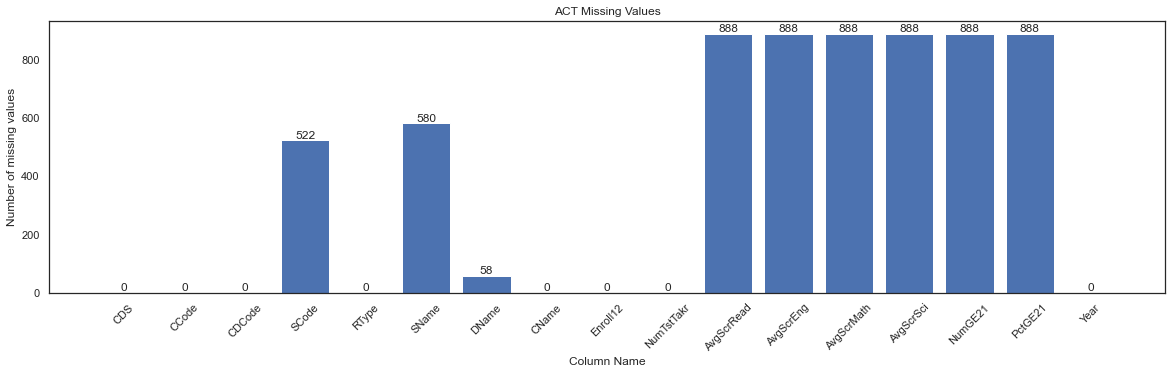

In [296]:
# For ACT
# Create a bar chart showing how many missing values are in each column

plt.figure(figsize = (20, 5))
null_bar = plt.bar(x = ACT_df.isnull().sum().index, height = ACT_df.isnull().sum())
plt.xlabel("Column Name")
plt.ylabel("Number of missing values")
plt.xticks(rotation = 45)
plt.title("ACT Missing Values")
plt.bar_label(null_bar);

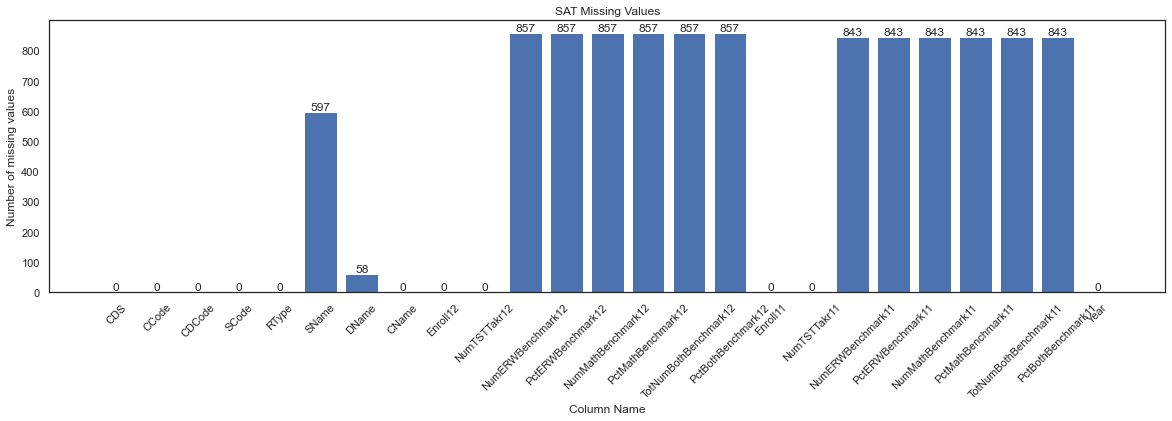

In [297]:
# For SAT
# Create a bar chart showing how many missing values are in each column

plt.figure(figsize = (20, 5))
null_bar = plt.bar(x = SAT_df.isnull().sum().index, height = SAT_df.isnull().sum())
plt.xlabel("Column Name")
plt.ylabel("Number of missing values")
plt.title("SAT Missing Values")
plt.xticks(rotation = 45)
plt.bar_label(null_bar);

#### Data type conversion

Observations from missing data 

* Seems that the missing values mainly came from school names, and test scores.

* The missing values from test scores could be due to lack of information. It could also be because there were no test takers during the year. We will not delete these missing rows as we are mainly interested in the mean scores of the district. 

* There are also some missing values in district name ("DNAME") column, however, we also observe that we have full information for district codes, as such, we may be able to obtain the names by referencing the datasets with other data source. 

For now, we will convert the data types from object to string/float so that we can aggregate the data by district.

In [298]:
# First we will see the data types for both df
print("ACT before conversion:\n", ACT_df.dtypes)
print("SAT before conversion:\n", SAT_df.dtypes)

ACT before conversion:
 CDS           float64
CCode           int64
CDCode          int64
SCode         float64
RType          object
SName          object
DName          object
CName          object
Enroll12        int64
NumTstTakr      int64
AvgScrRead     object
AvgScrEng      object
AvgScrMath     object
AvgScrSci      object
NumGE21        object
PctGE21        object
Year           object
dtype: object
SAT before conversion:
 CDS                      float64
CCode                      int64
CDCode                     int64
SCode                      int64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                   int64
NumTSTTakr12               int64
NumERWBenchmark12         object
PctERWBenchmark12         object
NumMathBenchmark12        object
PctMathBenchmark12        object
TotNumBothBenchmark12     object
PctBothBenchmark12        object
Enroll11                   int64
Num

In [299]:
# Convert dtype for test scores and benchmarks

# ACT_df columns to convert
ACT_to_convert_col_names = ACT_df.columns[10:16]
#print("ACT_df columns to convert:\n", ACT_to_convert_col_names)

# SAT_df columns to convert
SAT_to_convert_col_names = SAT_df.columns[10:16].append(SAT_df.columns[18:-1])
#print("ACT_df columns to convert:\n", SAT_to_convert_col_names)

# Converstion 
ACT_df[ACT_to_convert_col_names] = ACT_df[ACT_to_convert_col_names].astype("float")
SAT_df[SAT_to_convert_col_names] = SAT_df[SAT_to_convert_col_names].astype("float")

In [300]:
print("ACT after conversion:\n", ACT_df.dtypes)
print("SAT after conversion:\n", SAT_df.dtypes)

ACT after conversion:
 CDS           float64
CCode           int64
CDCode          int64
SCode         float64
RType          object
SName          object
DName          object
CName          object
Enroll12        int64
NumTstTakr      int64
AvgScrRead    float64
AvgScrEng     float64
AvgScrMath    float64
AvgScrSci     float64
NumGE21       float64
PctGE21       float64
Year           object
dtype: object
SAT after conversion:
 CDS                      float64
CCode                      int64
CDCode                     int64
SCode                      int64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                   int64
NumTSTTakr12               int64
NumERWBenchmark12        float64
PctERWBenchmark12        float64
NumMathBenchmark12       float64
PctMathBenchmark12       float64
TotNumBothBenchmark12    float64
PctBothBenchmark12       float64
Enroll11                   int64
NumTS

In [301]:
SAT_df.isnull().sum()

CDS                        0
CCode                      0
CDCode                     0
SCode                      0
RType                      0
SName                    597
DName                     58
CName                      0
Enroll12                   0
NumTSTTakr12               0
NumERWBenchmark12        857
PctERWBenchmark12        857
NumMathBenchmark12       857
PctMathBenchmark12       857
TotNumBothBenchmark12    857
PctBothBenchmark12       857
Enroll11                   0
NumTSTTakr11               0
NumERWBenchmark11        843
PctERWBenchmark11        843
NumMathBenchmark11       843
PctMathBenchmark11       843
TotNumBothBenchmark11    843
PctBothBenchmark11       843
Year                       0
dtype: int64

#### Get district level data

We would get the district level data, which is indicated by "D" in "RType column

In [302]:
# For ACT
ACT_district_df = ACT_df.loc[ACT_df["RType"] == "D"]
ACT_district_df.head()

CDS  CCode  CDCode  SCode RType SName  \
1122  1.100170e+12      1  110017    NaN     D   NaN   
1123  1.611190e+12      1  161119    NaN     D   NaN   
1124  1.611270e+12      1  161127    NaN     D   NaN   
1125  1.611430e+12      1  161143    NaN     D   NaN   
1126  1.611500e+12      1  161150    NaN     D   NaN   

                                   DName    CName  Enroll12  NumTstTakr  \
1122  Alameda County Office of Education  Alameda       170           0   
1123                     Alameda Unified  Alameda       919         155   
1124                 Albany City Unified  Alameda       307          58   
1125                    Berkeley Unified  Alameda       820         227   
1126               Castro Valley Unified  Alameda       737         106   

      AvgScrRead  AvgScrEng  AvgScrMath  AvgScrSci  NumGE21  PctGE21     Year  
1122         NaN        NaN         NaN        NaN      NaN      NaN  2018-19  
1123        27.0       26.0        26.0       25.0    134.0    86.45  2018-19  
1124        28.0       27.0        27.0       26.0     51.0    87.93  2018-19  
1125        26.0       25.0        25.0       24.0    166.0    73.13  2018-19  
1126        26.0       25.0        25.0       25.0     82.0    77.36  2018-19

In [303]:
# For ACT
SAT_district_df = SAT_df.loc[SAT_df["RType"] == "D"]
#SAT_district_df.loc[(~SAT_district_df.PctBothBenchmark11.isnull()) | (~SAT_district_df.NumERWBenchmark12.isnull())]
SAT_district_df.head()

CDS  CCode   CDCode  SCode RType SName                  DName  \
2037  1.611760e+12      1   161176      0     D   NaN        Fremont Unified   
2038  1.612750e+12      1   161275      0     D   NaN  Piedmont City Unified   
2039  1.612910e+12      1   161291      0     D   NaN    San Leandro Unified   
2040  1.062170e+13     10  1062166      0     D   NaN         Fresno Unified   
2041  1.075130e+13     10  1075127      0     D   NaN        Mendota Unified   

        CName  Enroll12  NumTSTTakr12  NumERWBenchmark12  PctERWBenchmark12  \
2037  Alameda      2537           845              767.0              90.77   
2038  Alameda       231            78               68.0              87.18   
2039  Alameda       754           193              138.0              71.50   
2040   Fresno      4593          1048              611.0              58.30   
2041   Fresno       234            69               23.0              33.33   

      NumMathBenchmark12  PctMathBenchmark12  TotNumBothBenchmark12  \
2037               695.0               82.25                  678.0   
2038                62.0               79.49                   61.0   
2039                83.0               43.01                   77.0   
2040               344.0               32.82                  323.0   
2041                11.0               15.94                    9.0   

      PctBothBenchmark12  Enroll11  NumTSTTakr11  NumERWBenchmark11  \
2037               80.24      2555          1396             1365.0   
2038               78.21       208            97               97.0   
2039               39.90       695           458              239.0   
2040               30.82      4751          3017             1508.0   
2041               13.04       197            76               43.0   

      PctERWBenchmark11  NumMathBenchmark11  PctMathBenchmark11  \
2037              97.78              1321.0               94.63   
2038             100.00                96.0               98.97   
2039              52.18               140.0               30.57   
2040              49.98               723.0               23.96   
2041              56.58                24.0               31.58   

      TotNumBothBenchmark11  PctBothBenchmark11     Year  
2037                 1312.0               93.98  2018-19  
2038                   96.0               98.97  2018-19  
2039                  122.0               26.64  2018-19  
2040                  681.0               22.57  2018-19  
2041                   21.0               27.63  2018-19

#### Adding additional columns (while dealing with missing data)

Next, we will add additional information to the dataframe, while taking note of the following conditions due to missing values:

For ACT
* test_participation_rate = number of test takers / total enrolled (For SAT, will need to merge both Grade 11 and 12 to get a total participaton rate)

For SAT
* For rows with complete values for both Grade 11 and 12
    * We will merge both Grade 11 and Grade 12 data by adding up the data for both grades
* For rows with benchmark values for either Grade 11 and 12, but not both 
    * We will take the benchmark values for the available grade, but add up the enrollment and test taker values for both grades (since these 2 do not have missing values) to get the participation rate
* For rows with missing benchmark values for both grades, we can still add up the enrollment and test taker values for both grades (since these 2 do not have missing values) to get the participation rate, but will have missing values for the combined benchmark

In [304]:
# For ACT
ACT_district_df["act_participation_rate"] = ACT_district_df["NumTstTakr"] / ACT_district_df["Enroll12"] 

# rename some column names 
ACT_district_df.rename(columns = {"Enroll12": "act_enroll", 
                        "NumTstTakr":"act_num_test_taker",
                        "AvgScrRead":"act_average_reading_score",
                        "AvgScrEng":"act_average_english_score",
                        "AvgScrMath":"act_average_math_score",
                        "AvgScrSci":"act_average_science_score",
                        "NumGE21":"act_num_above_average_score",
                        "PctGE21":"act_percentage_above_average_score"
                       }, inplace = True) 

# Convert percentage to decimal approximation 
ACT_district_df["act_percentage_above_average_score"] = ACT_district_df["act_percentage_above_average_score"] / 100

ACT_district_df.head()

CDS  CCode  CDCode  SCode RType SName  \
1122  1.100170e+12      1  110017    NaN     D   NaN   
1123  1.611190e+12      1  161119    NaN     D   NaN   
1124  1.611270e+12      1  161127    NaN     D   NaN   
1125  1.611430e+12      1  161143    NaN     D   NaN   
1126  1.611500e+12      1  161150    NaN     D   NaN   

                                   DName    CName  act_enroll  \
1122  Alameda County Office of Education  Alameda         170   
1123                     Alameda Unified  Alameda         919   
1124                 Albany City Unified  Alameda         307   
1125                    Berkeley Unified  Alameda         820   
1126               Castro Valley Unified  Alameda         737   

      act_num_test_taker  act_average_reading_score  \
1122                   0                        NaN   
1123                 155                       27.0   
1124                  58                       28.0   
1125                 227                       26.0   
1126                 106                       26.0   

      act_average_english_score  act_average_math_score  \
1122                        NaN                     NaN   
1123                       26.0                    26.0   
1124                       27.0                    27.0   
1125                       25.0                    25.0   
1126                       25.0                    25.0   

      act_average_science_score  act_num_above_average_score  \
1122                        NaN                          NaN   
1123                       25.0                        134.0   
1124                       26.0                         51.0   
1125                       24.0                        166.0   
1126                       25.0                         82.0   

      act_percentage_above_average_score     Year  act_participation_rate  
1122                                 NaN  2018-19                0.000000  
1123                              0.8645  2018-19                0.168662  
1124                              0.8793  2018-19                0.188925  
1125                              0.7313  2018-19                0.276829  
1126                              0.7736  2018-19                0.143826

In [305]:
# For SAT
# For enrolment and test taker numbers which do not have missing values
SAT_district_df["sat_enroll"] = SAT_district_df["Enroll12"] + SAT_district_df["Enroll11"] 
SAT_district_df["sat_num_test_taker"] = SAT_district_df["NumTSTTakr12"] + SAT_district_df["NumTSTTakr11"] 
SAT_district_df["sat_participation_rate"] = SAT_district_df["sat_num_test_taker"] / SAT_district_df["sat_enroll"] 

# A function to get combined benchmark values depending on the availability of data for each row
def combined_benchmark(row):
    if np.isnan(row["NumERWBenchmark12"]) and np.isnan(row["NumERWBenchmark11"]): #if both grade 11 and 12 missing
        row["sat_num_erw_benchmark"] = np.nan
        row["sat_percentage_erw_benchmark"] = np.nan
        
        row["sat_num_math_benchmark"] = np.nan
        row["sat_percentage_math_benchmark"] = np.nan
        
        row["sat_num_both_benchmark"] = np.nan
        row["sat_percentage_both_benchmark"] = np.nan

        
    elif ~np.isnan(row["NumERWBenchmark12"]) and np.isnan(row["NumERWBenchmark11"]): # if grade 12 available and grade 11 missing
        row["sat_num_erw_benchmark"] = row["NumERWBenchmark12"]
        row["sat_percentage_erw_benchmark"] = row["sat_num_erw_benchmark"] / row["NumTSTTakr12"]
        
        row["sat_num_math_benchmark"] = row["NumMathBenchmark12"]
        row["sat_percentage_math_benchmark"] = row["sat_num_math_benchmark"] / row["NumTSTTakr12"]
        
        row["sat_num_both_benchmark"] = row["TotNumBothBenchmark12"]
        row["sat_percentage_both_benchmark"] = row["sat_num_both_benchmark"] / row["NumTSTTakr12"]
        
    elif np.isnan(row["NumERWBenchmark12"]) and ~np.isnan(row["NumERWBenchmark11"]): # if grade 12 missing and grade 11 available
        row["sat_num_erw_benchmark"] = row["NumERWBenchmark11"]
        row["sat_percentage_erw_benchmark"] = row["sat_num_erw_benchmark"] / row["NumTSTTakr11"]
        
        row["sat_num_math_benchmark"] = row["NumMathBenchmark11"]
        row["sat_percentage_math_benchmark"] = row["sat_num_math_benchmark"] / row["NumTSTTakr11"]
        
        row["sat_num_both_benchmark"] = row["TotNumBothBenchmark11"]
        row["sat_percentage_both_benchmark"] = row["sat_num_both_benchmark"] / row["NumTSTTakr11"]
        
    else: # if both grades available
        row["sat_num_erw_benchmark"] = row["NumERWBenchmark12"] + row["NumERWBenchmark11"]
        row["sat_percentage_erw_benchmark"] = row["sat_num_erw_benchmark"] / row["sat_num_test_taker"]
        
        row["sat_num_math_benchmark"] = row["NumMathBenchmark12"] + row["NumMathBenchmark11"]
        row["sat_percentage_math_benchmark"] = row["sat_num_math_benchmark"] / row["sat_num_test_taker"]
        
        row["sat_num_both_benchmark"] = row["TotNumBothBenchmark12"] + row["TotNumBothBenchmark11"]
        row["sat_percentage_both_benchmark"] = row["sat_num_both_benchmark"] / row["sat_num_test_taker"]
 
    return row
        
SAT_district_df = SAT_district_df.apply(combined_benchmark, axis = 1)


SAT_district_df.tail()

CDS  CCode   CDCode  SCode RType  SName  \
2571  4.970840e+13     49  4970839      0     D    NaN   
2572  5.071090e+13     50  5071092      0     D    NaN   
2573  5.071130e+13     50  5071134      0     D    NaN   
2574  5.075560e+13     50  5075556      0     D    NaN   
2575  5.772680e+13     57  5772678      0     D    NaN   

                             DName       CName  Enroll12  NumTSTTakr12  \
2571    Oak Grove Union Elementary      Sonoma        70             2   
2572  Hart-Ransom Union Elementary  Stanislaus        18             0   
2573                   Keyes Union  Stanislaus        25             0   
2574             Riverbank Unified  Stanislaus       179            40   
2575           Davis Joint Unified        Yolo       717           307   

      NumERWBenchmark12  PctERWBenchmark12  NumMathBenchmark12  \
2571                NaN                NaN                 NaN   
2572                NaN                NaN                 NaN   
2573                NaN                NaN                 NaN   
2574               23.0              57.50                13.0   
2575              293.0              95.44               274.0   

      PctMathBenchmark12  TotNumBothBenchmark12  PctBothBenchmark12  Enroll11  \
2571                 NaN                    NaN                 NaN        82   
2572                 NaN                    NaN                 NaN        17   
2573                 NaN                    NaN                 NaN        20   
2574               32.50                   11.0                27.5       213   
2575               89.25                  268.0                87.3       739   

      NumTSTTakr11  NumERWBenchmark11  PctERWBenchmark11  NumMathBenchmark11  \
2571             0                NaN                NaN                 NaN   
2572             0                NaN                NaN                 NaN   
2573             0                NaN                NaN                 NaN   
2574            78               45.0              57.69                25.0   
2575           474              454.0              95.78               428.0   

      PctMathBenchmark11  TotNumBothBenchmark11  PctBothBenchmark11     Year  \
2571                 NaN                    NaN                 NaN  2018-19   
2572                 NaN                    NaN                 NaN  2018-19   
2573                 NaN                    NaN                 NaN  2018-19   
2574               32.05                   21.0               26.92  2018-19   
2575               90.30                  421.0               88.82  2018-19   

      sat_enroll  sat_num_test_taker  sat_participation_rate  \
2571         152                   2                0.013158   
2572          35                   0                0.000000   
2573          45                   0                0.000000   
2574         392                 118                0.301020   
2575        1456                 781                0.536401   

      sat_num_erw_benchmark  sat_percentage_erw_benchmark  \
2571                    NaN                           NaN   
2572                    NaN                           NaN   
2573                    NaN                           NaN   
2574                   68.0                      0.576271   
2575                  747.0                      0.956466   

      sat_num_math_benchmark  sat_percentage_math_benchmark  \
2571                     NaN                            NaN   
2572                     NaN                            NaN   
2573                     NaN                            NaN   
2574                    38.0                       0.322034   
2575                   702.0                       0.898848   

      sat_num_both_benchmark  sat_percentage_both_benchmark  
2571                     NaN                            NaN  
2572                     NaN                            NaN  
2573                     NaN                            Na

#### Merge ACT and SAT

Next, we will merge the ACT and SAT datasets to get a dataset with both test data

In [306]:
# First, we only require some of the columns, so we will extract these

# For ACT
ACT_district_df_subset = ACT_district_df[["CDCode", "act_enroll", "act_num_test_taker", "act_participation_rate",
                                          "act_average_reading_score","act_average_english_score", "act_average_math_score", 
                                          "act_average_science_score", "act_num_above_average_score", "act_percentage_above_average_score"]]
# For SAT
SAT_district_df_subset = SAT_district_df[["CDCode", "sat_enroll", "sat_num_test_taker", "sat_participation_rate",
                                          "sat_num_erw_benchmark","sat_percentage_erw_benchmark", 
                                          "sat_num_math_benchmark", "sat_percentage_math_benchmark", 
                                          "sat_num_both_benchmark", "sat_percentage_both_benchmark"]]

In [307]:
# We will add a column with a sum total for all average scores
ACT_district_df_subset['act_average_composite_score'] = (ACT_district_df_subset['act_average_reading_score'] + ACT_district_df_subset['act_average_english_score'] + ACT_district_df_subset['act_average_math_score'] + ACT_district_df_subset['act_average_science_score']) / 4 

In [308]:
print(ACT_district_df_subset.shape)
ACT_district_df_subset.head()

(522, 11)


CDCode  act_enroll  act_num_test_taker  act_participation_rate  \
1122  110017         170                   0                0.000000   
1123  161119         919                 155                0.168662   
1124  161127         307                  58                0.188925   
1125  161143         820                 227                0.276829   
1126  161150         737                 106                0.143826   

      act_average_reading_score  act_average_english_score  \
1122                        NaN                        NaN   
1123                       27.0                       26.0   
1124                       28.0                       27.0   
1125                       26.0                       25.0   
1126                       26.0                       25.0   

      act_average_math_score  act_average_science_score  \
1122                     NaN                        NaN   
1123                    26.0                       25.0   
1124                    27.0                       26.0   
1125                    25.0                       24.0   
1126                    25.0                       25.0   

      act_num_above_average_score  act_percentage_above_average_score  \
1122                          NaN                                 NaN   
1123                        134.0                              0.8645   
1124                         51.0                              0.8793   
1125                        166.0                              0.7313   
1126                         82.0                              0.7736   

      act_average_composite_score  
1122                          NaN  
1123                        26.00  
1124                        27.00  
1125                        25.00  
1126                        25.25

In [309]:
print(SAT_district_df_subset.shape)
SAT_district_df_subset.head()

(539, 10)


CDCode  sat_enroll  sat_num_test_taker  sat_participation_rate  \
2037   161176        5092                2241                0.440102   
2038   161275         439                 175                0.398633   
2039   161291        1449                 651                0.449275   
2040  1062166        9344                4065                0.435039   
2041  1075127         431                 145                0.336427   

      sat_num_erw_benchmark  sat_percentage_erw_benchmark  \
2037                 2132.0                      0.951361   
2038                  165.0                      0.942857   
2039                  377.0                      0.579109   
2040                 2119.0                      0.521279   
2041                   66.0                      0.455172   

      sat_num_math_benchmark  sat_percentage_math_benchmark  \
2037                  2016.0                       0.899598   
2038                   158.0                       0.902857   
2039                   223.0                       0.342550   
2040                  1067.0                       0.262485   
2041                    35.0                       0.241379   

      sat_num_both_benchmark  sat_percentage_both_benchmark  
2037                  1990.0                       0.887996  
2038                   157.0                       0.897143  
2039                   199.0                       0.305684  
2040                  1004.0                       0.246986  
2041                    30.0                       0.206897

In [310]:
# Next we will merge both test result subsets
test_results_combined = ACT_district_df_subset.merge(right = SAT_district_df_subset, how = "outer", on = "CDCode")
print(test_results_combined.shape)
test_results_combined.head()

(539, 20)


CDCode  act_enroll  act_num_test_taker  act_participation_rate  \
0  110017       170.0                 0.0                0.000000   
1  161119       919.0               155.0                0.168662   
2  161127       307.0                58.0                0.188925   
3  161143       820.0               227.0                0.276829   
4  161150       737.0               106.0                0.143826   

   act_average_reading_score  act_average_english_score  \
0                        NaN                        NaN   
1                       27.0                       26.0   
2                       28.0                       27.0   
3                       26.0                       25.0   
4                       26.0                       25.0   

   act_average_math_score  act_average_science_score  \
0                     NaN                        NaN   
1                    26.0                       25.0   
2                    27.0                       26.0   
3                    25.0                       24.0   
4                    25.0                       25.0   

   act_num_above_average_score  act_percentage_above_average_score  \
0                          NaN                                 NaN   
1                        134.0                              0.8645   
2                         51.0                              0.8793   
3                        166.0                              0.7313   
4                         82.0                              0.7736   

   act_average_composite_score  sat_enroll  sat_num_test_taker  \
0                          NaN         345                 143   
1                        26.00        1790                 812   
2                        27.00         569                 261   
3                        25.00        1691                 704   
4                        25.25        1496                 661   

   sat_participation_rate  sat_num_erw_benchmark  \
0                0.414493                   62.0   
1                0.453631                  677.0   
2                0.458699                  254.0   
3                0.416322                  621.0   
4                0.441845                  606.0   

   sat_percentage_erw_benchmark  sat_num_math_benchmark  \
0                      0.433566                    28.0   
1                      0.833744                   598.0   
2                      0.973180                   238.0   
3                      0.882102                   525.0   
4                      0.916793                   545.0   

   sat_percentage_math_benchmark  sat_num_both_benchmark  \
0                       0.195804                    24.0   
1                       0.736453                   570.0   
2                       0.911877                   237.0   
3                       0.745739                   518.0   
4                       0.824508                   527.0   

   sat_percentage_both_benchmark  
0                       0.167832  
1                       0.701970  
2                       0.908046  
3                       0.735795  
4                       0.797277

In [311]:
# And see the number of missing values
test_results_combined.isnull().sum()

CDCode                                  0
act_enroll                             17
act_num_test_taker                     17
act_participation_rate                 17
act_average_reading_score             189
act_average_english_score             189
act_average_math_score                189
act_average_science_score             189
act_num_above_average_score           189
act_percentage_above_average_score    189
act_average_composite_score           189
sat_enroll                              0
sat_num_test_taker                      0
sat_participation_rate                  0
sat_num_erw_benchmark                 124
sat_percentage_erw_benchmark          124
sat_num_math_benchmark                124
sat_percentage_math_benchmark         124
sat_num_both_benchmark                124
sat_percentage_both_benchmark         124
dtype: int64

It can be seen that there are 17 more districts with SAT test than ACT test.

ACT test also has more missing values than SAT test.

Let us see how many records there are with missing scores/benchmarks for both tests.

In [312]:
# number of rows with missing score/benchmark values for both ACT and SAT 
test_results_combined[(test_results_combined["act_average_reading_score"].isnull()) & (test_results_combined["sat_num_erw_benchmark"].isnull())].shape

(119, 20)

There are 119 districts with missing score/benchmark values for both tests. For now, we will not remove these as we can still get the participation rate from these records.

In [313]:
test_results_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 538
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CDCode                              539 non-null    int64  
 1   act_enroll                          522 non-null    float64
 2   act_num_test_taker                  522 non-null    float64
 3   act_participation_rate              522 non-null    float64
 4   act_average_reading_score           350 non-null    float64
 5   act_average_english_score           350 non-null    float64
 6   act_average_math_score              350 non-null    float64
 7   act_average_science_score           350 non-null    float64
 8   act_num_above_average_score         350 non-null    float64
 9   act_percentage_above_average_score  350 non-null    float64
 10  act_average_composite_score         350 non-null    float64
 11  sat_enroll                          539 non-n

The datatypes for different variables also looks to be what we wanted them to be.

### Other data souces (district level socio-economic-demographic data)

We will now attempt to process additional datasets about the socio-economic-demographic condition of the districts. This is so that we can draw deeper insights regarding what might have resulted in the poor results in some districts.

#### Import datasets

In [314]:
school_district_info_df = pd.read_csv("../data/california_school_district_info.csv")
school_district_nces_info_df = pd.read_csv("../data/california_school_district_NCES_info.csv")

In [315]:
print(school_district_info_df.shape)
school_district_info_df.head()

(944, 69)


OBJECTID     Year   FedID  CDCode       CDSCode CountyName  \
0         1  2018-19  601770  161119  1.611190e+12    Alameda   
1         2  2018-19  601860  161127  1.611270e+12    Alameda   
2         3  2018-19  604740  161143  1.611430e+12    Alameda   
3         4  2018-19  607800  161150  1.611500e+12    Alameda   
4         5  2018-19  612630  161168  1.611680e+12    Alameda   

              DistrictNa DistrictTy GradeLow  GradeHigh GradeLowCe  \
0        Alameda Unified    Unified       KG         12         KG   
1    Albany City Unified    Unified       KG         12         KG   
2       Berkeley Unified    Unified       KG         12         KG   
3  Castro Valley Unified    Unified       KG         12         KG   
4          Emery Unified    Unified       KG         12         KG   

   GradeHighC                 AssistStat CongressUS  SenateCA AssemblyCA  \
0          12  Differentiated Assistance         13         9         18   
1          12         General Assistance         13         9         15   
2          12  Differentiated Assistance         13         9         15   
3          12         General Assistance      13,15  07,09,10      18,20   
4          12  Differentiated Assistance         13         9         15   

             LocaleDist                                       UpdateNote  \
0  21 - Suburban, Large  2018-19 District Boundary Adjustment/Correction   
1  21 - Suburban, Large  2018-19 District Boundary Adjustment/Correction   
2    12 - City, Midsize  2018-19 District Boundary Adjustment/Correction   
3  21 - Suburban, Large  2018-19 District Boundary Adjustment/Correction   
4  21 - Suburban, Large  2018-19 District Boundary Adjustment/Correction   

   EnrollTota  EnrollChar  EnrollNonC  AAcount      AApct  AIcount  AIpct  \
0       11260        1877        9383      825   7.300000       28    0.2   
1        3682           0        3682      111   3.000000        4    0.1   
2       10194         383        9811     1440  14.100000       16    0.2   
3        9269           0        9269      489   5.300000       19    0.2   
4         743           0         743      326  43.900002        1    0.1   

   AScount      ASpct  FIcount  FIpct  HIcount      HIpct  MRcount  MRpct  \
0     2854  25.299999      683    6.1     1960  17.400000     1310   11.6   
1     1063  28.900000       47    1.3      592  16.100000      510   13.9   
2      731   7.200000       83    0.8     2438  23.900000     1465   14.4   
3     2539  27.400000      420    4.5     2204  23.799999      909    9.8   
4       83  11.200000       11    1.5      185  24.900000       62    8.3   

   PIcount  PIpct  WHcount      WHpct  NRcount  NRpct  ELcount  ELpct  \
0       67    0.6     3244  28.799999      289    2.6     1601   14.2   
1        6    0.2     1163  31.600000      186    5.1      583   15.8   
2       14    0.1     3999  39.200001        8    0.1      953    9.3   
3       47    0.5     2480  26.799999      162    1.7     1021   11.0   
4        8    1.1       67   9.000000        0    0.0      160   21.5   

   FOScount  FOSpct  HOMcount  HOMpct  MIGcount  MIGpct  SWDcount  SWDpct  \
0        26     0.2        67     0.6         0     0.0      1289    11.4   
1         2     0.1        12     0.3         0     0.0       312     8.5   
2        23     0.2       265     2.6         0     0.0      1148    11.3   
3        12     0.1        68     0.7         0     0.0       800     8.6   
4         1     0.1         7     0.9         0     0.0        55     7.4   

   SEDcount     SEDpct  UPcount      UPpct  ELATested  ELAStdMetP  MathTested  \
0      3523  31.299999     3144  33.500000     4567.0   69.400002      4587.0   
1       777  21.100000     1118  30.400000     1773.0   79.199997      1795.0   
2      3331  32.700001     3275  33.400002     4614.0   66.699997      4549.0   
3      2284  24.600000     2739  29.600000     4844.0   68.099998      4850.0   
4       600  80.800003      613  83.099998  

In [316]:
print(school_district_nces_info_df.shape)
school_district_nces_info_df.head()

(944, 33)


Unnamed: 0  NCES_ID          district_name district_type total_population  \
0           0   601770        Alameda Unified       Unified           78,522   
1           1   601860    Albany City Unified       Unified           19,862   
2           2   604740       Berkeley Unified       Unified          121,444   
3           3   607800  Castro Valley Unified       Unified           50,946   
4           4   612630          Emery Unified       Unified           11,899   

  median_household_income total_household white black hispanic_or_latino  \
0                $104,756          30,418   43%    7%                13%   
1                 $95,783           7,467   44%    3%                15%   
2                 $85,444          45,337   53%    8%                11%   
3                $114,277          17,666   47%    5%                13%   
4                $102,725           6,568   40%   15%                10%   

  asian american_indian/alaskan_native hawaiian_and_other_pacific_islander  \
0   30%                             0%                                  0%   
1   29%                             1%                                  0%   
2   21%                             0%                                  0%   
3   30%                             1%                                  0%   
4   29%                             0%                                  1%   

  some_other_race_alone two_or_more_races  \
0                    1%                6%   
1                    2%                6%   
2                    0%                6%   
3                    0%                5%   
4                    0%                6%   

  housing_structure_built_2000_and_after housing_structure_built_1970-1999  \
0                                  6.60%                            31.30%   
1                                    13%                            23.30%   
2                                  5.30%                            16.80%   
3                                  5.30%                            39.20%   
4                                 33.20%                            49.80%   

  housing_structure_built_before_1970 household_with_broadband_internet  \
0                              62.20%                            90.40%   
1                              63.60%                            83.80%   
2                              77.90%                            91.20%   
3                              55.50%                               92%   
4                              16.90%                            91.20%   

  housing_structure_type_house housing_structure_type_apartment  \
0                       52.90%                           47.30%   
1                       52.60%                           47.30%   
2                       45.80%                           54.20%   
3                          84%                           16.10%   
4                          13%                              87%   

  speak_english_only_children under18_with_disability  \
0                      71.90%                   5.10%   
1                      66.20%                   1.90%   
2                      80.90%                   3.10%   
3                      71.80%                      4%   
4                      67.50%                      0%   

  under18_with_health_insurance family_income_below_poverty  \
0                        98.20%                       9.80%   
1                        99.40%                       6.50%   
2                        98.70%                       4.30%   
3                        98.20%                       7.90%   
4                          100%                      22.40%   

  married_couple_household cohabitating_couple_household  \
0                      71%                            5%   
1                      75%                            5%   
2                      68%                            5%   
3                      75%              

#### Add additional columns

We will add just two more columns for percentage of students who went to charter school and non-charter school.

In [317]:
school_district_info_df["charter_school_percentage"] = school_district_info_df["EnrollChar"] / school_district_info_df["EnrollTota"]* 100

school_district_info_df["non_charter_school_percentage"] = school_district_info_df["EnrollNonC"] / school_district_info_df["EnrollTota"]* 100

#### Obtain subset of dataframes

As both dataframes could certain information of the same categories, we will extract a subset of features from both dataframes before merging them.

In [318]:
# Extract subset from "school_district_info_df"
cols_school_district_info_df = ["FedID","CDCode","CountyName","DistrictNa","DistrictTy","LocaleDist","EnrollTota","charter_school_percentage","non_charter_school_percentage","HOMpct","MIGpct","DropOutPct","SuspPct"]
school_district_info_df_subset = school_district_info_df[cols_school_district_info_df]

# rename column names
school_district_info_df_subset.rename({"FedID": "NCES_ID", "CountyName": "county_name", "DistrictNa": "district_name",
                                       "DistrictTy": "district_type", "LocaleDist": "urban_locale", "EnrollTota": "total_enrolment",
                                      "HOMpct": "homeless_student_percentage", "MIGpct": "migrant_student_percentage", 
                                      "DropOutPct": "dropout_percentage", "SuspPct": "suspension_percentage"}, inplace = True, axis = 1)


# Extract subset from "school_district_nces_info_df"
school_district_nces_info_df_subset = school_district_nces_info_df.drop(["district_name", "district_type", "district_urban_type"], axis = 1)

In [319]:
print(school_district_info_df_subset.shape)
school_district_info_df_subset.head()

(944, 13)


NCES_ID  CDCode county_name          district_name district_type  \
0   601770  161119     Alameda        Alameda Unified       Unified   
1   601860  161127     Alameda    Albany City Unified       Unified   
2   604740  161143     Alameda       Berkeley Unified       Unified   
3   607800  161150     Alameda  Castro Valley Unified       Unified   
4   612630  161168     Alameda          Emery Unified       Unified   

           urban_locale  total_enrolment  charter_school_percentage  \
0  21 - Suburban, Large            11260                  16.669627   
1  21 - Suburban, Large             3682                   0.000000   
2    12 - City, Midsize            10194                   3.757112   
3  21 - Suburban, Large             9269                   0.000000   
4  21 - Suburban, Large              743                   0.000000   

   non_charter_school_percentage  homeless_student_percentage  \
0                      83.330373                          0.6   
1                     100.000000                          0.3   
2                      96.242888                          2.6   
3                     100.000000                          0.7   
4                     100.000000                          0.9   

   migrant_student_percentage  dropout_percentage  suspension_percentage  
0                         0.0                 5.2                    2.6  
1                         0.0                 1.7                    1.9  
2                         0.0                10.7                    1.4  
3                         0.0                 3.0                    2.2  
4                         0.0                 0.0                    3.6

In [320]:
print(school_district_nces_info_df_subset.shape)
school_district_nces_info_df_subset.head()

(944, 30)


Unnamed: 0  NCES_ID total_population median_household_income  \
0           0   601770           78,522                $104,756   
1           1   601860           19,862                 $95,783   
2           2   604740          121,444                 $85,444   
3           3   607800           50,946                $114,277   
4           4   612630           11,899                $102,725   

  total_household white black hispanic_or_latino asian  \
0          30,418   43%    7%                13%   30%   
1           7,467   44%    3%                15%   29%   
2          45,337   53%    8%                11%   21%   
3          17,666   47%    5%                13%   30%   
4           6,568   40%   15%                10%   29%   

  american_indian/alaskan_native hawaiian_and_other_pacific_islander  \
0                             0%                                  0%   
1                             1%                                  0%   
2                             0%                                  0%   
3                             1%                                  0%   
4                             0%                                  1%   

  some_other_race_alone two_or_more_races  \
0                    1%                6%   
1                    2%                6%   
2                    0%                6%   
3                    0%                5%   
4                    0%                6%   

  housing_structure_built_2000_and_after housing_structure_built_1970-1999  \
0                                  6.60%                            31.30%   
1                                    13%                            23.30%   
2                                  5.30%                            16.80%   
3                                  5.30%                            39.20%   
4                                 33.20%                            49.80%   

  housing_structure_built_before_1970 household_with_broadband_internet  \
0                              62.20%                            90.40%   
1                              63.60%                            83.80%   
2                              77.90%                            91.20%   
3                              55.50%                               92%   
4                              16.90%                            91.20%   

  housing_structure_type_house housing_structure_type_apartment  \
0                       52.90%                           47.30%   
1                       52.60%                           47.30%   
2                       45.80%                           54.20%   
3                          84%                           16.10%   
4                          13%                              87%   

  speak_english_only_children under18_with_disability  \
0                      71.90%                   5.10%   
1                      66.20%                   1.90%   
2                      80.90%                   3.10%   
3                      71.80%                      4%   
4                      67.50%                      0%   

  under18_with_health_insurance family_income_below_poverty  \
0                        98.20%                       9.80%   
1                        99.40%                       6.50%   
2                        98.70%                       4.30%   
3                        98.20%                       7.90%   
4                          100%                      22.40%   

  married_couple_household cohabitating_couple_household  \
0                      71%                            5%   
1                      75%                            5%   
2                      68%                            5%   
3                      75%                            5%   
4                      47%                            3%   

  female_householder_household male_householder_household  \
0                          19%                         5%   
1                  

#### Merging dataframes

We will then merge the subsets of both dataframes, making use of NCID_ID as key.

In [321]:
school_district_full_info_df = school_district_info_df_subset.merge(right = school_district_nces_info_df_subset, on = "NCES_ID", how = "outer")
print(school_district_full_info_df.shape)
school_district_full_info_df.head()

(944, 42)


NCES_ID  CDCode county_name          district_name district_type  \
0   601770  161119     Alameda        Alameda Unified       Unified   
1   601860  161127     Alameda    Albany City Unified       Unified   
2   604740  161143     Alameda       Berkeley Unified       Unified   
3   607800  161150     Alameda  Castro Valley Unified       Unified   
4   612630  161168     Alameda          Emery Unified       Unified   

           urban_locale  total_enrolment  charter_school_percentage  \
0  21 - Suburban, Large            11260                  16.669627   
1  21 - Suburban, Large             3682                   0.000000   
2    12 - City, Midsize            10194                   3.757112   
3  21 - Suburban, Large             9269                   0.000000   
4  21 - Suburban, Large              743                   0.000000   

   non_charter_school_percentage  homeless_student_percentage  \
0                      83.330373                          0.6   
1                     100.000000                          0.3   
2                      96.242888                          2.6   
3                     100.000000                          0.7   
4                     100.000000                          0.9   

   migrant_student_percentage  dropout_percentage  suspension_percentage  \
0                         0.0                 5.2                    2.6   
1                         0.0                 1.7                    1.9   
2                         0.0                10.7                    1.4   
3                         0.0                 3.0                    2.2   
4                         0.0                 0.0                    3.6   

   Unnamed: 0 total_population median_household_income total_household white  \
0           0           78,522                $104,756          30,418   43%   
1           1           19,862                 $95,783           7,467   44%   
2           2          121,444                 $85,444          45,337   53%   
3           3           50,946                $114,277          17,666   47%   
4           4           11,899                $102,725           6,568   40%   

  black hispanic_or_latino asian american_indian/alaskan_native  \
0    7%                13%   30%                             0%   
1    3%                15%   29%                             1%   
2    8%                11%   21%                             0%   
3    5%                13%   30%                             1%   
4   15%                10%   29%                             0%   

  hawaiian_and_other_pacific_islander some_other_race_alone two_or_more_races  \
0                                  0%                    1%                6%   
1                                  0%                    2%                6%   
2                                  0%                    0%                6%   
3                                  0%                    0%                5%   
4                                  1%                    0%                6%   

  housing_structure_built_2000_and_after housing_structure_built_1970-1999  \
0                                  6.60%                            31.30%   
1                                    13%                            23.30%   
2                                  5.30%                            16.80%   
3                                  5.30%                            39.20%   
4                                 33.20%                            49.80%   

  housing_structure_built_before_1970 household_with_broadband_internet  \
0                              62.20%                            90.40%   
1                              63.60%                            83.80%   
2                              77.90%                            91.20%   
3                              55.50%                               92%   
4                              16.90%                            91.20%   

  housing_

#### Data type conversion

In [322]:
# The data types of the dataframe
school_district_full_info_df.dtypes

NCES_ID                                     int64
CDCode                                      int64
county_name                                object
district_name                              object
district_type                              object
urban_locale                               object
total_enrolment                             int64
charter_school_percentage                 float64
non_charter_school_percentage             float64
homeless_student_percentage               float64
migrant_student_percentage                float64
dropout_percentage                        float64
suspension_percentage                     float64
Unnamed: 0                                  int64
total_population                           object
median_household_income                    object
total_household                            object
white                                      object
black                                      object
hispanic_or_latino                         object


For consistency purposes, we will convert all percentages to decimal approximation of the percent

In [323]:
# Convert to decimal approximation of percentage

# Column names of those we would like to convert
cols_to_decimal_approx = ["charter_school_percentage", "non_charter_school_percentage", "homeless_student_percentage",
                         "migrant_student_percentage", "dropout_percentage", "suspension_percentage",
                         "white", "black", "hispanic_or_latino", "asian", "american_indian/alaskan_native",
                         "hawaiian_and_other_pacific_islander", "some_other_race_alone", "two_or_more_races",
                         "housing_structure_built_2000_and_after", "housing_structure_built_1970-1999", "housing_structure_built_before_1970",
                         "household_with_broadband_internet", "housing_structure_type_house", "housing_structure_type_apartment",
                         "speak_english_only_children", "under18_with_disability", "under18_with_health_insurance", 
                          "family_income_below_poverty", "married_couple_household", "cohabitating_couple_household", 
                         "female_householder_household", "male_householder_household", "parents_not_in_labor_force", "bachelors_or_higher"]

# function to apply conversion 
def convert_to_deci(col): 
    if col.name in cols_to_decimal_approx:  # if column name is in the selected columns to convert
        return col.map(decimal_approximation, na_action = 'ignore') # apply decimal_approximation function written earlier
    else:
        return col # if not, return original column

school_district_full_info_df = school_district_full_info_df.apply(convert_to_deci, axis = 0)


In [324]:
school_district_full_info_df.dtypes

NCES_ID                                     int64
CDCode                                      int64
county_name                                object
district_name                              object
district_type                              object
urban_locale                               object
total_enrolment                             int64
charter_school_percentage                 float64
non_charter_school_percentage             float64
homeless_student_percentage               float64
migrant_student_percentage                float64
dropout_percentage                        float64
suspension_percentage                     float64
Unnamed: 0                                  int64
total_population                           object
median_household_income                    object
total_household                            object
white                                     float64
black                                     float64
hispanic_or_latino                        float64


#### Add additional column

We will add an additional columns to indicate the majority race of the district.

In [325]:
# function to determine majority race
def majority_race(row):
    races_list = ["white", "black", "hispanic_or_latino", "asian", "american_indian/alaskan_native", "hawaiian_and_other_pacific_islander",
                 "some_other_race_alone", "two_or_more_races"]
    values_list = [row[race] for race in races_list]
    majority_race = races_list[values_list.index(max(values_list))]
    row["majority_race"] = majority_race
    
    if majority_race == "white":
        row["white_majority"] = "yes"
    else: 
        row["white_majority"] = "yes"
        
    return row

school_district_full_info_df = school_district_full_info_df.apply(majority_race, axis = 1)

### Merge all dataframes into one single dataframe

In [326]:
# Merge
school_district_merge_full = school_district_full_info_df.merge(right = test_results_combined, on = "CDCode", how = "left")

# Clean up some of the columns and change data type
school_district_merge_full["total_population"] = school_district_merge_full["total_population"].str.replace(",", "").astype("float")
school_district_merge_full["median_household_income"] = school_district_merge_full["median_household_income"].str.replace(",", "").str.replace("$", "").astype("float")
school_district_merge_full["total_household"] = school_district_merge_full["total_household"].str.replace(",", "").astype("float")

# We will add another column for act average composite score / dollar expenditure per student
school_district_merge_full['act_average_composite_score_per_dollar_expenditure'] = school_district_merge_full['act_average_composite_score'] / school_district_merge_full['expenditure_per_student']

In [327]:
# We will also convert urban_locale to ordered categorical data type (ordered by size)
# We are only doing this after merging as merging causes the categorical dtype to revert to object type

from pandas.api.types import CategoricalDtype

# Base on NCES locale classification : https://nces.ed.gov/programs/edge/docs/locale_classifications.pdf
ordered_categories = np.sort(school_district_full_info_df["urban_locale"].unique())
cat_type = CategoricalDtype(categories= ordered_categories, ordered = True)
school_district_merge_full["urban_locale"] = school_district_merge_full["urban_locale"].astype(cat_type)
school_district_merge_full["urban_locale"].dtype

CategoricalDtype(categories=['11 - City, Large', '12 - City, Midsize', '13 - City, Small',
                  '21 - Suburban, Large', '22 - Suburban, Midsize',
                  '23 - Suburban, Small', '31 - Town, Fringe',
                  '32 - Town, Distant', '33 - Town, Remote',
                  '41 - Rural, Fringe', '42 - Rural, Distant',
                  '43 - Rural, Remote'],
                 ordered=True)

In [328]:
# Subset: rows with either ACT or SAT data
school_district_merge_subset = school_district_merge_full[(~school_district_merge_full["act_enroll"].isnull()) | (~school_district_merge_full["sat_enroll"].isnull())].drop("Unnamed: 0", axis = 1)

print(school_district_merge_subset.shape)
school_district_merge_subset.head()

(475, 63)


NCES_ID  CDCode county_name          district_name district_type  \
0   601770  161119     Alameda        Alameda Unified       Unified   
1   601860  161127     Alameda    Albany City Unified       Unified   
2   604740  161143     Alameda       Berkeley Unified       Unified   
3   607800  161150     Alameda  Castro Valley Unified       Unified   
4   612630  161168     Alameda          Emery Unified       Unified   

           urban_locale  total_enrolment  charter_school_percentage  \
0  21 - Suburban, Large            11260                   0.166696   
1  21 - Suburban, Large             3682                   0.000000   
2    12 - City, Midsize            10194                   0.037571   
3  21 - Suburban, Large             9269                   0.000000   
4  21 - Suburban, Large              743                   0.000000   

   non_charter_school_percentage  homeless_student_percentage  \
0                       0.833304                        0.006   
1                       1.000000                        0.003   
2                       0.962429                        0.026   
3                       1.000000                        0.007   
4                       1.000000                        0.009   

   migrant_student_percentage  dropout_percentage  suspension_percentage  \
0                         0.0               0.052                  0.026   
1                         0.0               0.017                  0.019   
2                         0.0               0.107                  0.014   
3                         0.0               0.030                  0.022   
4                         0.0               0.000                  0.036   

   total_population  median_household_income  total_household  white  black  \
0           78522.0                 104756.0          30418.0   0.43   0.07   
1           19862.0                  95783.0           7467.0   0.44   0.03   
2          121444.0                  85444.0          45337.0   0.53   0.08   
3           50946.0                 114277.0          17666.0   0.47   0.05   
4           11899.0                 102725.0           6568.0   0.40   0.15   

   hispanic_or_latino  asian  american_indian/alaskan_native  \
0                0.13   0.30                            0.00   
1                0.15   0.29                            0.01   
2                0.11   0.21                            0.00   
3                0.13   0.30                            0.01   
4                0.10   0.29                            0.00   

   hawaiian_and_other_pacific_islander  some_other_race_alone  \
0                                 0.00                   0.01   
1                                 0.00                   0.02   
2                                 0.00                   0.00   
3                                 0.00                   0.00   
4                                 0.01                   0.00   

   two_or_more_races  housing_structure_built_2000_and_after  \
0               0.06                                   0.066   
1               0.06                                   0.130   
2               0.06                                   0.053   
3               0.05                                   0.053   
4               0.06                                   0.332   

   housing_structure_built_1970-1999  housing_structure_built_before_1970  \
0                              0.313                                0.622   
1                              0.233                                0.636   
2                              0.168                                0.779   
3                              0.392                                0.555   
4                              0.498                                0.169   

   household_with_broadband_internet  housing_structure_type_house  \
0                              0.904                         0.529   
1                              0.838                         0

After merging the dataframes with the test results and the dataframes with the demographic information, we have extracted 475 school districts with 60 columns each.

Although not all rows have complete information, we will keep all rows for the analysis as at least some data from each row can be useful for our exploratory data analysis.

In [329]:
school_district_merge_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 943
Data columns (total 63 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   NCES_ID                                             475 non-null    int64   
 1   CDCode                                              475 non-null    int64   
 2   county_name                                         475 non-null    object  
 3   district_name                                       475 non-null    object  
 4   district_type                                       475 non-null    object  
 5   urban_locale                                        475 non-null    category
 6   total_enrolment                                     475 non-null    int64   
 7   charter_school_percentage                           475 non-null    float64 
 8   non_charter_school_percentage                       475 non-null    fl

In [330]:
# Export df to csv
#school_district_merge_subset.to_csv("../data/merged_df.csv")

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

| Feature                                     | Type    | Dataset                                      | Description                                                                                                                                    |
| ------------------------------------------- | ------- | -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| NCES\_ID                                    | int64   | california\_school\_district\_info.csv       | School district identifier for National Center for Education Statistics (NCES)                                                                 |
| CDCode                                      | int64   | california\_school\_district\_info.csv       | Official school district Identifier                                                                                                            |
| county\_name                                | object  | california\_school\_district\_info.csv       | County name                                                                                                                                    |
| district\_name                              | object  | california\_school\_district\_info.csv       | School district name                                                                                                                           |
| district\_type                              | object  | california\_school\_district\_info.csv       | Type of school district                                                                                                                        |
| urban\_locale                               | object  | california\_school\_district\_info.csv       | Urban locale of school district (city, suburb, fringe, rural, etc)                                                                             |
| total\_enrolment                            | int64   | california\_school\_district\_info.csv       | Total student enrolment                                                                                                                        |
| charter\_school\_percentage                 | float64 | california\_school\_district\_info.csv       | Percentage of students in charter school                                                                                                       |
| non\_charter\_school\_percentage            | float64 | california\_school\_district\_info.csv       | Percentage of students in non-charter school (Public)                                                                                          |
| homeless\_student\_percentage               | float64 | california\_school\_district\_info.csv       | Percentage of students who are homeless                                                                                                        |
| migrant\_student\_percentage                | float64 | california\_school\_district\_info.csv       | Percentage of students who are migrants                                                                                                        |
| dropout\_percentage                         | float64 | california\_school\_district\_info.csv       | Percentage of students who dropped out                                                                                                         |
| suspension\_percentage                      | float64 | california\_school\_district\_info.csv       | Percentage of students suspended                                                                                                               |
| total\_population                           | float64  | california\_school\_district\_NCES\_info.csv | Total population of district                                                                                                                   |
| median\_household\_income                    | float64  | california\_school\_district\_NCES\_info.csv | Median houshold income of district                                                                                                             |
| total\_household                            | float64  | california\_school\_district\_NCES\_info.csv | Total household number of district                                                                                                             |
| white                                       | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are white                                                                                                |
| black                                       | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are black                                                                                                |
| hispanic\_or\_latino                        | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are hispanic\_or\_latino                                                                                 |
| asian                                       | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are asian                                                                                                |
| american\_indian/alaskan\_native            | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are american indian/alaskan native                                                                       |
| hawaiian\_and\_other\_pacific\_islander     | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are hawaiian and other pacific islanders                                                                 |
| some\_other\_race\_alone                    | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are from other races                                                                                     |
| two\_or\_more\_races                        | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who are from or mores                                                                                        |
| housing\_structure\_built\_2000\_and\_after | float64 | california\_school\_district\_NCES\_info.csv | Percentage of houses built 2000 and after                                                                                                      |
| housing\_structure\_built\_1970-1999        | float64 | california\_school\_district\_NCES\_info.csv | Percentage of houses built from 1970 to 1999                                                                                                   |
| housing\_structure\_built\_before\_1970     | float64 | california\_school\_district\_NCES\_info.csv | Percentage of houses built before 1970s                                                                                                        |
| household\_with\_broadband\_internet        | float64 | california\_school\_district\_NCES\_info.csv | Percentage of households with internet broadband                                                                                               |
| housing\_structure\_type\_house             | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who live in houses                                                                                           |
| housing\_structure\_type\_apartment         | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who live in apartments                                                                                       |
| speak\_english\_only\_children              | float64 | california\_school\_district\_NCES\_info.csv | Percentage of district population who speak english ony                                                                                        |
| under18\_with\_disability                   | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students with disability                                                                                                         |
| under18\_with\_health\_insurance            | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students with health insurance coverage                                                                                          |
| family\_income\_below\_poverty              | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students with family income below poverty level                                                                                  |
| married\_couple\_household                  | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students who are from married couple households                                                                                  |
| cohabitating\_couple\_household             | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students who are from cohabitating couple households                                                                             |
| female\_householder\_household              | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students who are from households with female householder only                                                                    |
| male\_householder\_household                | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students who are from households with male householder only                                                                      |
| parents\_not\_in\_labor\_force              | float64 | california\_school\_district\_NCES\_info.csv | Percentage of students with parents not in labor force                                                                                         |
| bachelors\_or\_higher                       | float64 | california\_school\_district\_NCES\_info.csv | Pencentage of students with parents who possess at least a bachelor's degree                                                                   |
| expenditure\_per\_student                   | float64 | california\_school\_district\_NCES\_info.csv | Expenditure per student of the school district                                                                                                 |
| majority\_race                              | object | california\_school\_district\_NCES\_info.csv | The majority race of the district
    |
| white\_majority                              | object | california\_school\_district\_NCES\_info.csv | Whether the majority race of the district is white
    |
| act\_enroll                                 | float64 | act\_2019\_ca.csv                            | Enrollment of Grade 12                                                                                                                         |
| act\_num\_test\_taker                       | float64 | act\_2019\_ca.csv                            | Number of Test Takers for ACT                                                                                                                  |
| act\_participation\_rate                    | float64 | act\_2019\_ca.csv                            | Participation Rate of Grade 12 in ACT                                                                                                          |
| act\_average\_reading\_score                | float64 | act\_2019\_ca.csv                            | Average ACT Reading Score                                                                                                                      |
| act\_average\_english\_score                | float64 | act\_2019\_ca.csv                            | Average ACT  English Score                                                                                                                     |
| act\_average\_math\_score                   | float64 | act\_2019\_ca.csv                            | Average ACT Math Score                                                                                                                         |
| act\_average\_science\_score                | float64 | act\_2019\_ca.csv                            | Average ACT Science Score                                                                                                                      |
| act\_num\_above\_average\_score             | float64 | act\_2019\_ca.csv                            | Number of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21.                                                                   |
| act\_percentage\_above\_average\_score      | float64 | act\_2019\_ca.csv                            | Percent of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21                                                                   |
| sat\_enroll                                 | float64 | sat\_2019\_ca.csv                            | Enrollment of Grade 12 and Grade 11                                                                                                            |
| sat\_num\_test\_taker                       | float64 | sat\_2019\_ca.csv                            | Number of Test Takers for SAT                                                                                                                  |
| sat\_participation\_rate                    | float64 | sat\_2019\_ca.csv                            | Participation Rate of Grade 12 and 11 in ACT                                                                                                   |
| sat\_num\_erw\_benchmark                    | float64 | sat\_2019\_ca.csv                            | The number meeting the Evidence-Based Reading & Writing (ERW) benchmark established by the College Board based on the New 2016 SAT test format |
| sat\_percentage\_erw\_benchmark             | float64 | sat\_2019\_ca.csv                            | The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test                                      |
| sat\_num\_math\_benchmark                   | float64 | sat\_2019\_ca.csv                            | The number of students who met or exceeded the benchmark for the New SAT Math test format                                                      |
| sat\_percentage\_math\_benchmark            | float64 | sat\_2019\_ca.csv                            | The percent of students who met or exceeded the benchmark for SAT Math test                                                                    |
| sat\_num\_both\_benchmark                   | float64 | sat\_2019\_ca.csv                            | The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math                                     |
| sat\_percentage\_both\_benchmark            | float64 | sat\_2019\_ca.csv                            | The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Mat                                           |

## Exploratory Data Analysis

### Summary Statistics

In [331]:
# Summary of main statistics for each variable
school_district_merge_subset.drop(["NCES_ID", "CDCode"], axis = 1).describe()

total_enrolment  charter_school_percentage  \
count       475.000000                 475.000000   
mean      10642.488421                   0.121028   
std       30288.521502                   0.243808   
min          28.000000                   0.000000   
25%        1552.000000                   0.000000   
50%        4466.000000                   0.000000   
75%       11831.000000                   0.108319   
max      607723.000000                   0.995446   

       non_charter_school_percentage  homeless_student_percentage  \
count                     475.000000                   475.000000   
mean                        0.878972                     0.031722   
std                         0.243808                     0.047381   
min                         0.004554                     0.000000   
25%                         0.891681                     0.005000   
50%                         1.000000                     0.013000   
75%                         1.000000                     0.039500   
max                         1.000000                     0.368000   

       migrant_student_percentage  dropout_percentage  suspension_percentage  \
count                  475.000000          462.000000             475.000000   
mean                     0.014307            0.088385               0.042617   
std                      0.030067            0.123798               0.030278   
min                      0.000000            0.000000               0.000000   
25%                      0.000000            0.029000               0.021000   
50%                      0.000000            0.054500               0.038000   
75%                      0.015000            0.095500               0.057000   
max                      0.205000            0.938000               0.259000   

       total_population  median_household_income  total_household       white  \
count      4.750000e+02               475.000000     4.750000e+02  475.000000   
mean       8.430221e+04             73029.294737     2.794049e+04    0.472463   
std        2.409532e+05             28810.334871     8.234240e+04    0.242464   
min        4.100000e+01             21648.000000     1.400000e+01    0.010000   
25%        9.817000e+03             51863.000000     3.170000e+03    0.260000   
50%        3.414700e+04             67258.000000     1.138400e+04    0.490000   
75%        9.298150e+04             88252.500000     3.060950e+04    0.680000   
max        4.723575e+06            224205.000000     1.608570e+06    0.890000   

            black  hispanic_or_latino       asian  \
count  475.000000          475.000000  475.000000   
mean     0.034674            0.360147    0.087768   
std      0.046179            0.236082    0.120654   
min      0.000000            0.030000    0.000000   
25%      0.010000            0.160000    0.010000   
50%      0.020000            0.300000    0.040000   
75%      0.040000            0.530000    0.110000   
max      0.430000            0.980000    0.660000   

       american_indian/alaskan_native  hawaiian_and_other_pacific_islander  \
count                      475.000000                           475.000000   
mean                         0.012000                             0.002400   
std                          0.039367                             0.005822   
min                          0.000000                             0.000000   
25%                          0.000000                             0.000000   
50%                          0.000000                             0.000000   
75%                          0.010000                             0.000000   
max                          0.530000                             0.060000   

       some_other_race_alone  two_or_more_races  \
count             475.000000         475.000000   
mean                0.001263           0.029432   
std                 0.003799           0.017317   
min                 0.000000           0.000000   
25%                 

Just looking at the ACT and SAT data, we see that:
* more people chose to participate in SAT over ACT, SAT has almost double the mean participation rate than ACT
* For both ACT and SAT, slightly more than 50% of test takers achieves the overall benchmark for the tests

### Standard Deviation

In [332]:
# Using the function defined earlier, get standard deviation for numeric columns
sd = {school_district_merge_subset[col_name].name : standard_deviation(school_district_merge_subset[~school_district_merge_subset[col_name].isnull()][col_name]) 
      for col_name in school_district_merge_subset.columns
     if school_district_merge_subset[col_name].dtype == 'float64' or school_district_merge_subset[col_name].dtype == 'int64'}

sd

{'NCES_ID': 15364.673625764257,
 'CDCode': 1552763.0351146937,
 'total_enrolment': 30256.622049628702,
 'charter_school_percentage': 0.24355160909302706,
 'non_charter_school_percentage': 0.24355160909302712,
 'homeless_student_percentage': 0.04733071418293694,
 'migrant_student_percentage': 0.030035457212354275,
 'dropout_percentage': 0.12366432215319996,
 'suspension_percentage': 0.030246157198029942,
 'total_population': 240699.39097648003,
 'median_household_income': 28779.992224450754,
 'total_household': 82255.67693456516,
 'white': 0.24220834052857607,
 'black': 0.04613080763158581,
 'hispanic_or_latino': 0.2358335259600702,
 'asian': 0.12052721488977464,
 'american_indian/alaskan_native': 0.039325898791883813,
 'hawaiian_and_other_pacific_islander': 0.005815406036419224,
 'some_other_race_alone': 0.003795317132067337,
 'two_or_more_races': 0.01729901282950408,
 'housing_structure_built_2000_and_after': 0.11150748881599773,
 'housing_structure_built_1970-1999': 0.136458128425156

### Trends

#### Which California district has the highest and lowest test benchmarks

We will use percentage of students who meets the benchmark for both SAT and ACT.

##### Highest

In [333]:
# ACT Top 5
school_district_merge_subset.loc[~school_district_merge_subset["act_percentage_above_average_score"].isnull()].sort_values(
    by = "act_percentage_above_average_score", ascending = False)[["district_name", "act_percentage_above_average_score"]].head()

district_name  act_percentage_above_average_score
569      Lakeside Union Elementary                              1.0000
677  Los Gatos-Saratoga Union High                              0.9610
12           Piedmont City Unified                              0.9483
671             Fremont Union High                              0.9427
278              La Canada Unified                              0.9420

In [334]:
# SAT Top 5
school_district_merge_subset.loc[~school_district_merge_subset["sat_percentage_both_benchmark"].isnull()].sort_values(
    by = "sat_percentage_both_benchmark", ascending = False)[["district_name", "sat_percentage_both_benchmark"]].head()

district_name  sat_percentage_both_benchmark
278              La Canada Unified                       0.948276
300             San Marino Unified                       0.943662
686              Palo Alto Unified                       0.943284
677  Los Gatos-Saratoga Union High                       0.941834
321        Manhattan Beach Unified                       0.929577

##### Lowest

In [335]:
# ACT Bottom 5
school_district_merge_subset.loc[~school_district_merge_subset["act_percentage_above_average_score"].isnull()].sort_values(
    by = "act_percentage_above_average_score", ascending = False)[["district_name", "act_percentage_above_average_score"]].tail()

district_name  act_percentage_above_average_score
107            Washington Unified                              0.0826
315               Compton Unified                              0.0717
387  Tulelake Basin Joint Unified                              0.0667
228           Reef-Sunset Unified                              0.0357
103         Golden Plains Unified                              0.0000

In [336]:
# SAT Top 5
school_district_merge_subset.loc[~school_district_merge_subset["sat_percentage_both_benchmark"].isnull()].sort_values(
    by = "sat_percentage_both_benchmark", ascending = False)[["district_name", "sat_percentage_both_benchmark"]].tail()

district_name  sat_percentage_both_benchmark
414       Calistoga Joint Unified                       0.127660
99   Firebaugh-Las Deltas Unified                       0.109489
899          Farmersville Unified                       0.098361
160    San Pasqual Valley Unified                       0.083333
103         Golden Plains Unified                       0.007634

We see certain recurring names in top 5 and bottom 5 of both tests. 

* Top 5 in both tests
    * Los Gatos-Saratoga Union High	
    * La Canada Unified
* Bottom 5 in both tests
    * Golden Plains Unified	

These are school districts which consistently do well or not so well.

## Visualize the Data

### Analysis of Dependent Variable - ACT and SAT test results

#### Histogram

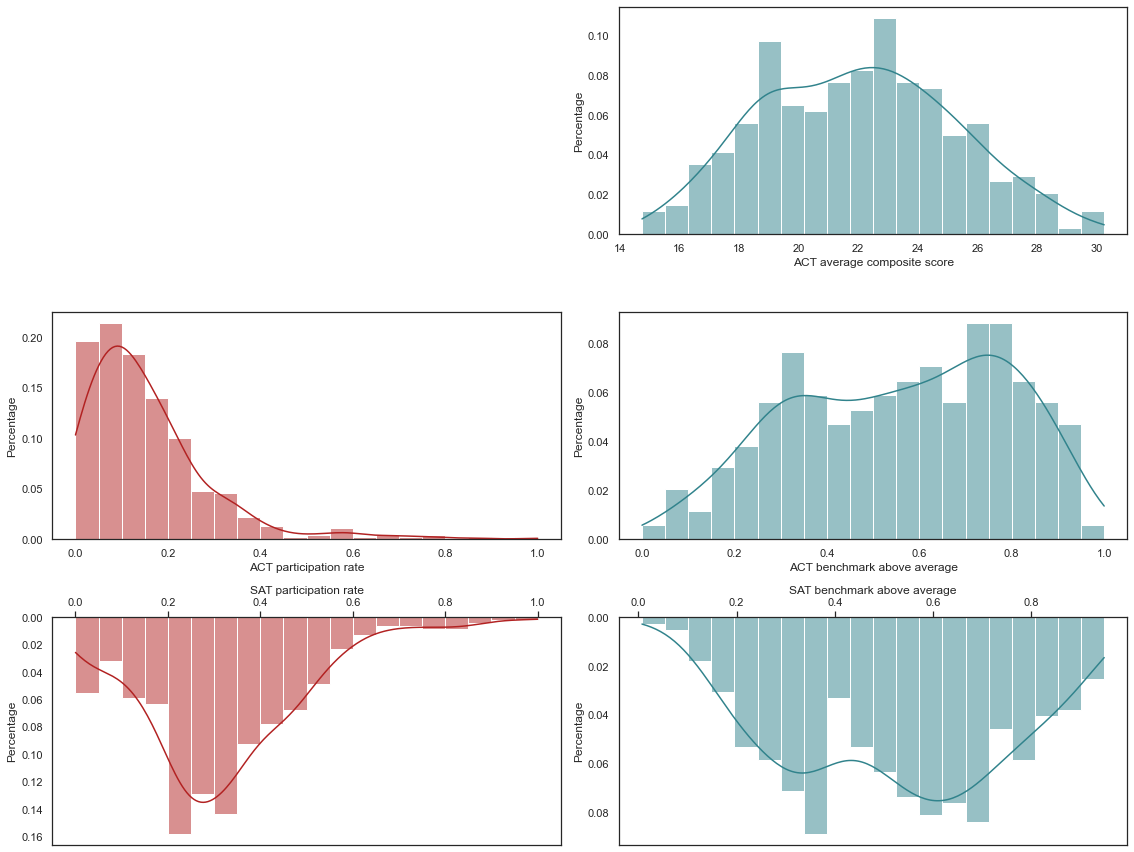

In [337]:

plt.figure(figsize = (16,12))

# composite score
# top-right: ACT composite score
ax0 = plt.subplot(322) 
sns.histplot(school_district_merge_subset["act_average_composite_score"] , bins = 20, stat= "probability", kde = True, color = "#31838C")
ax0.set_xlabel("ACT average composite score")
ax0.set_ylabel("Percentage")

# Participation rate
# second-left: ACT participation rate
ax1 = plt.subplot(323) 
sns.histplot(school_district_merge_subset[school_district_merge_subset["act_participation_rate"]<=1]["act_participation_rate"] , bins = 20, stat= "probability", kde = True, color = "firebrick")
ax1.set_xlabel("ACT participation rate")
ax1.set_ylabel("Percentage")

# bottom-left: SAT participation rate
ax2 = plt.subplot(325) 
sns.histplot(school_district_merge_subset[school_district_merge_subset["sat_participation_rate"]<=1]["sat_participation_rate"] , bins = 20, stat= "probability", kde = True, color = "firebrick", cbar_kws = {'sharex' : ax1})
ax2.set_xlabel("SAT participation rate")
ax2.set_ylabel("Percentage")
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.invert_yaxis()

# Benchmark percentage
# second-right: ACT benchmark percentage
ax3 = plt.subplot(324) 
sns.histplot(school_district_merge_subset[school_district_merge_subset["act_percentage_above_average_score"]<=1]["act_percentage_above_average_score"] , bins = 20, stat= "probability", kde = True, color = "#31838C")
ax3.set_xlabel("ACT benchmark above average")
ax3.set_ylabel("Percentage")

# bottom-right: SAT benchmark percentage
ax4 = plt.subplot(326) 
sns.histplot(school_district_merge_subset[school_district_merge_subset["sat_percentage_both_benchmark"]<=1]["sat_percentage_both_benchmark"] , bins = 20, stat= "probability", kde = True, color = "#31838C", cbar_kws = {'sharex' : ax3})
ax4.set_xlabel("SAT benchmark above average")
ax4.set_ylabel("Percentage")
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top') 
ax4.invert_yaxis()

plt.tight_layout();

In terms of **participation rate**. SAT seems to be the more popular choice amongst students in California, with the median at about 0.32 compared to about 0.16 for ACT. More ACT participation rate for districts tend to be below 0.3 percent, while there is still sizeable participation rate for SAT which are more than 0.3. This perhaps means that SAT is a more representative indicator for California students as it takes a larger sample size of the cohort.

In terms of **percentage benchmark above average**, both tests are similar in terms of distribution. With a rather large spread and a more obvious trough (just above 0.4) in between 2 crests.

#### Correlation between ACT and SAT tests

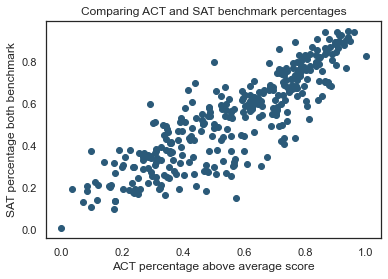

In [338]:
plt.scatter(school_district_merge_subset["act_percentage_above_average_score"], school_district_merge_subset["sat_percentage_both_benchmark"], color = "#2B5A79")
plt.xlabel("ACT percentage above average score")
plt.ylabel("SAT percentage both benchmark");
plt.title("Comparing ACT and SAT benchmark percentages");

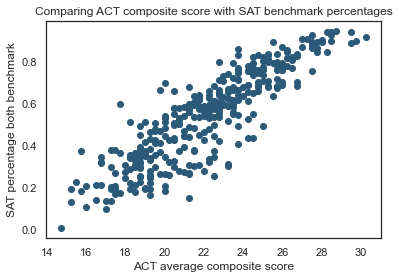

In [339]:
plt.scatter(school_district_merge_subset["act_average_composite_score"], school_district_merge_subset["sat_percentage_both_benchmark"], color = "#2B5A79")
plt.xlabel("ACT average composite score")
plt.ylabel("SAT percentage both benchmark");
plt.title("Comparing ACT composite score with SAT benchmark percentages");

In [340]:
school_district_merge_subset[["act_percentage_above_average_score", "sat_percentage_both_benchmark"]].corr()

act_percentage_above_average_score  \
act_percentage_above_average_score                            1.000000   
sat_percentage_both_benchmark                                 0.869943   

                                    sat_percentage_both_benchmark  
act_percentage_above_average_score                       0.869943  
sat_percentage_both_benchmark                            1.000000

By comparing between the benchmark percentages for both ACT and SAT, we see a high level of correlation between the two tests. As such, it should not matter that much which indicator we used. 

For SAT, it has the advantage of more students in California taking it. 

For ACT, it has the composite score, which is the average score across subjects for a district (while SAT benchmark makes the percentage of test takers scoring above a certain level), this may offer a higher correlation with the independent variables.

#### Correlaton between SAT participation rate and benchmark

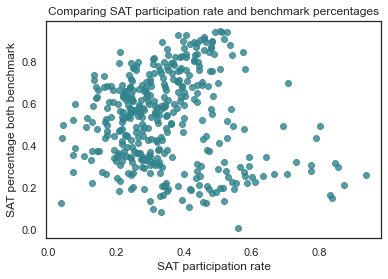

In [341]:
plt.scatter(school_district_merge_subset["sat_participation_rate"], school_district_merge_subset["sat_percentage_both_benchmark"], color = "#31838C", alpha = 0.8)
plt.xlabel("SAT participation rate")
plt.ylabel("SAT percentage both benchmark");
plt.title("Comparing SAT participation rate and benchmark percentages");

In [342]:
school_district_merge_subset[["sat_participation_rate", "sat_percentage_both_benchmark"]].corr()

sat_participation_rate  \
sat_participation_rate                       1.000000   
sat_percentage_both_benchmark               -0.058162   

                               sat_percentage_both_benchmark  
sat_participation_rate                             -0.058162  
sat_percentage_both_benchmark                       1.000000

There does not seem to be a significant correlation between participation rate and benchmark.

### Analysis of relationship between independent and dependent variables

<AxesSubplot:>

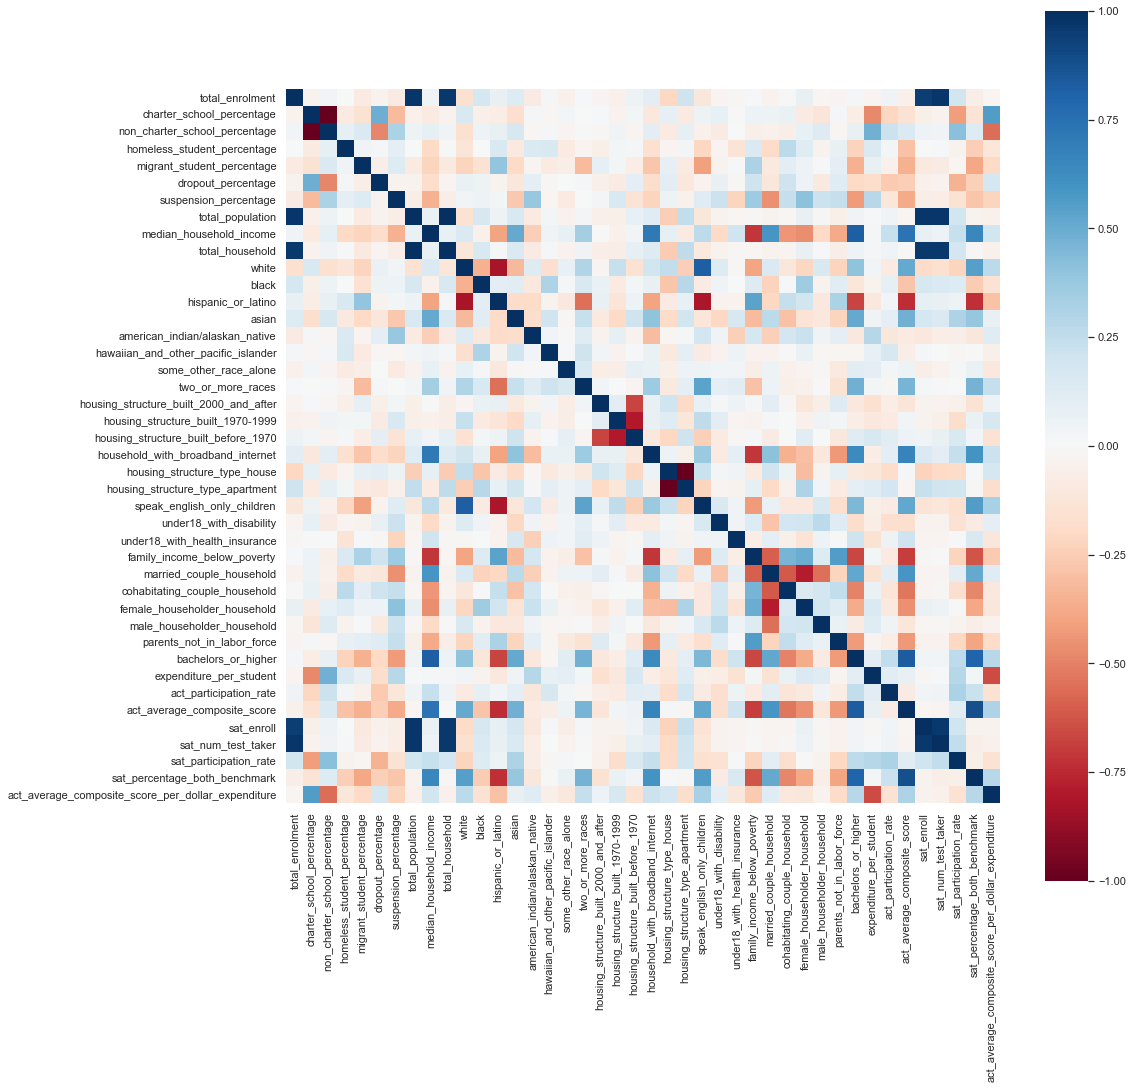

In [343]:
# Get correlation between different variables 
# As we clearly know that the aggregated scores and benchmarks are derived from individual subjects, we will not visualize its constituents

corr = school_district_merge_subset.drop(["NCES_ID", "CDCode", "act_enroll", "act_num_test_taker", 
                                          "act_average_reading_score", "act_average_english_score",
                                         "act_average_math_score", "act_average_science_score", 
                                          "act_num_above_average_score", "act_percentage_above_average_score",
                                         "sat_num_erw_benchmark", "sat_percentage_erw_benchmark",
                                         "sat_num_math_benchmark", "sat_percentage_math_benchmark", "sat_num_both_benchmark"], axis = 1).corr()

plt.figure(figsize = (16,16))
sns.heatmap(corr, square = True, annot = False, cmap = "RdBu")

We will extract variables with with correlation larger than or equals to 0.5 for ACT participation rate and act average composite score.

median_household_income              0.741621
white                                0.510368
hispanic_or_latino                  -0.734650
household_with_broadband_internet    0.670722
speak_english_only_children          0.515659
family_income_below_poverty         -0.690693
married_couple_household             0.592471
cohabitating_couple_household       -0.537570
bachelors_or_higher                  0.832104
act_average_composite_score          1.000000
sat_percentage_both_benchmark        0.876822
Name: act_average_composite_score, dtype: float64

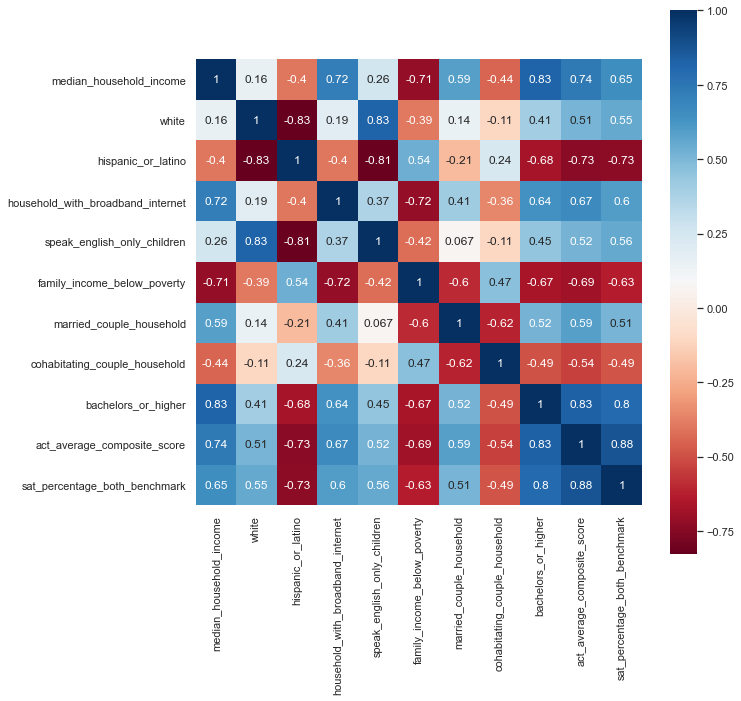

In [344]:
corr_subset = corr[(corr >= 0.5) | (corr <= -0.5)]["act_average_composite_score"].dropna(how = 'all')

plt.figure(figsize = (10,10))
sns.heatmap(corr.loc[corr_subset.index, corr_subset.index], square = True, annot = True, cmap = "RdBu")
corr_subset

The above independent variables have at least a 0.5 correlation with act average composite score. Next we will examine the variables more closely.

### Questions to ask?

#### Does money buy results?

Even before deciding how and where its best to spend the education budget, it is perhaps wise to see if money actually brings better results. Since both the government level education budget and parental investment can potentially bring about results, we will analyse results with regards to both expenditure per student and medium household income of each education district.

##### Does increasing expenditure per student bring about results? 

Expenditure per student refers to district level educational spending per student, and consists of the following areas:
* Instructional Expenditures
* Student and Staff Support
* Administration
* Operations, Food Service, other

Refer to [Source](https://nces.ed.gov/ccd/districtsearch/district_detail.asp?Search=1&State=06&County=Inyo&ID2=0622710&details=4) for more details

These are money that is spent directly to support the educational system. One would expect that directly investing in the education system would bring about better result, but is that the case?

We will see if increasing spending is actually correlated with higher percentage of students scoring above benchmark, which would indicate a higher chance of success in college.

expenditure_per_student  \
expenditure_per_student                       1.000000   
sat_percentage_both_benchmark                 0.027872   

                               sat_percentage_both_benchmark  
expenditure_per_student                             0.027872  
sat_percentage_both_benchmark                       1.000000

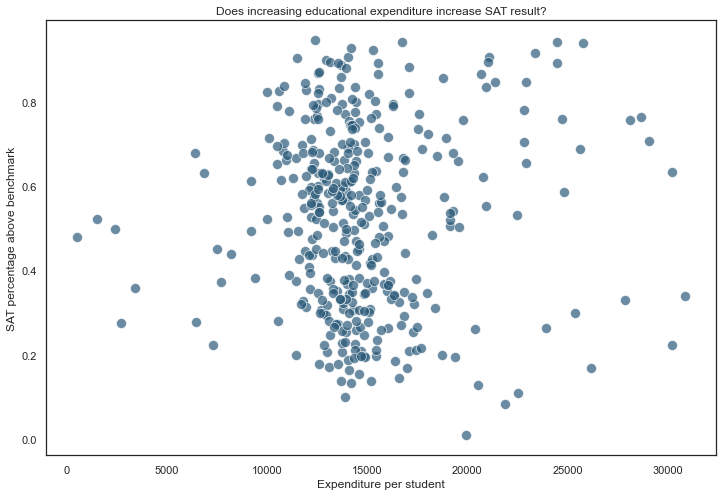

In [345]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = school_district_merge_subset, x = "expenditure_per_student", y = "sat_percentage_both_benchmark", color = "#2B5A79", s = 100, alpha  = 0.7)
plt.xlabel("Expenditure per student")
plt.ylabel("SAT percentage above benchmark")
plt.title("Does increasing educational expenditure increase SAT result?")

school_district_merge_subset[["expenditure_per_student", "sat_percentage_both_benchmark"]].corr()

Looking at the correlation, the correlation of 0.028 does not show a strong correlation between expenditure per student and the SAT benchmark result. 

However, we do see a concentration of expenditure between 10,000 USD and 20,000 USD per student, but within this range of expenditures, we see a rather large disparity for the SAT score.

We will perform another analysis by grouping the expenditure into different bins.

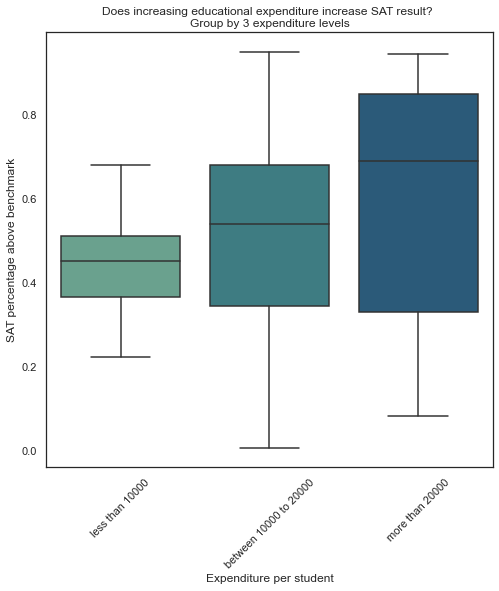

In [346]:
# Create 3 "bins" according to expenditure per student

def expenditure_bins(row):
    if row["expenditure_per_student"] < 10000:
        row["expenditure_level"] = "less than 10000"
    elif row["expenditure_per_student"] > 20000:
        row["expenditure_level"] = "more than 20000"
    else:
        row["expenditure_level"] = "between 10000 to 20000"
    return row

# Plot violinplot
plt.figure(figsize = (8,8))
sns.boxplot(data = school_district_merge_subset.apply(expenditure_bins, axis = 1), x = "expenditure_level", y = "sat_percentage_both_benchmark", 
            order = ["less than 10000", "between 10000 to 20000", "more than 20000"], palette = "crest")

plt.xticks(rotation = 45);
plt.xlabel("Expenditure per student")
plt.ylabel("SAT percentage above benchmark");
plt.title("Does increasing educational expenditure increase SAT result? \nGroup by 3 expenditure levels");


By grouping the expenditure per student into 3 groups, we do see an observation:
+ At higher expenditure brackets, there are indeed a higher percentage of students scoring above the SAT benchmark
+ The benefit is more obvious for districts with a expenditure per student of less than 10000, both in terms of median and higher upper range
+ The effect of increasing expenditure less less obvious from 10,000 onwards, althought the median benchmark percentage increases, the highest percentage reached is actually lower
- Importantly, it should be noted that increasing expenditure does not guarantee results, since there are low values even for expenditure above 10,000 USD per student, therefore, other reasons must have also influenced the disparity

**But still, shoud we simply increase funding for schools without thinking about how they spend it?**

###### Charter vs Non-charter schools

Another angle which we may approach the expenditure debate from that of charter vs non-charter schools. 

Just for a basic background information, charter and non-charter schools are both public schools in that they receive funding from the government. The two differs in that charter schools are run by independent groups, even non-profit groups, and they do not need to adhere to most guidelines which government non-charter public schools.Essentially, more freedom in the way the school is ran. However, they also tend to receive less funding from the government than non-charter schools [Souce](https://www.vox.com/2014/4/30/18076968/charter-schools), in part because they are not funded for facilities. This may also mean that facilities cost may sometimes encroach into the operating cost, hence less spending per student.

Let us first see if school districts with a higher percentage of charter schools indeed spend lesser on students. 

Correlation between charter school percentage and expediture:  -0.4781707916995651


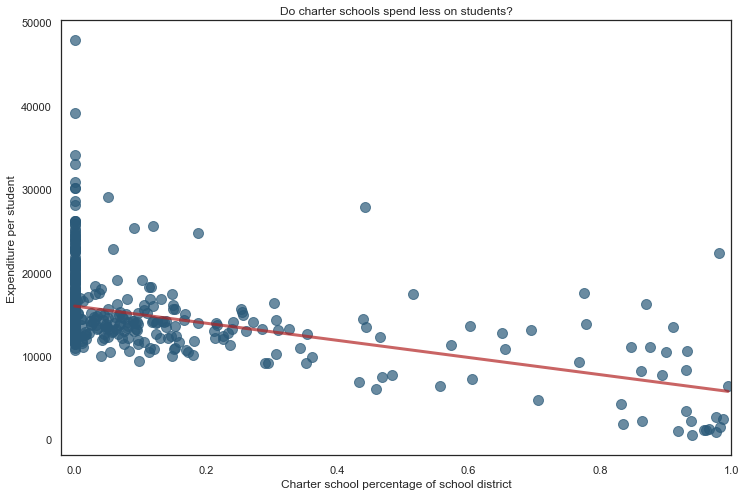

In [347]:
# Corr coef 
print("Correlation between charter school percentage and expediture: ", 
      school_district_merge_subset[['charter_school_percentage', 'expenditure_per_student']].corr().iloc[1,0])

# Plotting charter school percentage vs expenditure
plt.figure(figsize = (12,8))

sns.regplot(data = school_district_merge_subset, x = "charter_school_percentage", y = "expenditure_per_student", ci= None,
           scatter_kws = {'s':100, 'alpha': 0.7, 'color': "#2B5A79"},
           line_kws = {"linewidth": 3, 'color': 'firebrick', 'alpha': 0.7})
plt.xlabel("Charter school percentage of school district")
plt.ylabel("Expenditure per student")
plt.xlim(-0.02, 1)
plt.title("Do charter schools spend less on students?");

There is a -0.48 correlation, not a particularly strong one, but considering that we are looking at the correlation for the entire district (remember that each district consists of both charter and non-charter schools) consisting both charter and non-charter schools, we will accept this correlation coefficient as sufficient for now. 

From the scatter plot, we see that the values for districts with 0%  charter school can reach a higher level of expenditure per student and overall we do see a decreasing trend. 

Now let us see the ACT performance for districts with different percentages of charter schools.

Correlation between charter school percentage and ACT average composite score:  -0.14897158256143714


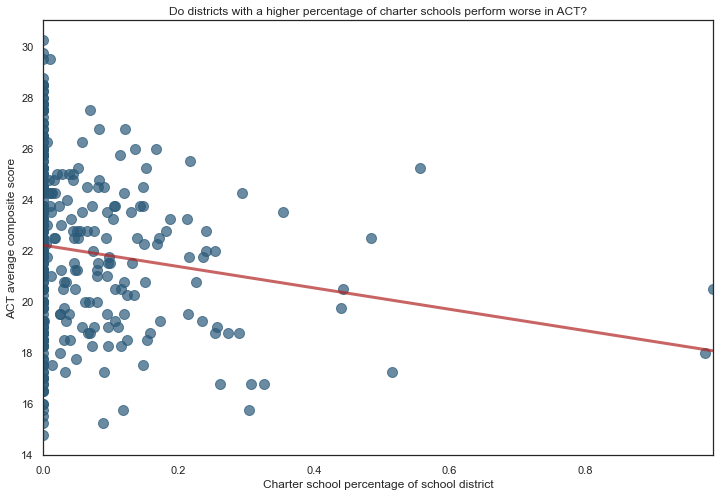

In [348]:
plt.figure(figsize = (12,8))

sns.regplot(data = school_district_merge_subset, x = "charter_school_percentage", y = "act_average_composite_score", ci= None,
           scatter_kws = {'s':100, 'alpha': 0.7, 'color': "#2B5A79"},
           line_kws = {"linewidth": 3, 'color': 'firebrick', 'alpha': 0.7})
plt.xlabel("Charter school percentage of school district")
plt.ylabel("ACT average composite score")
plt.title("Do districts with a higher percentage of charter schools perform worse in ACT?");

print("Correlation between charter school percentage and ACT average composite score: ", 
      school_district_merge_subset[['charter_school_percentage', 'act_average_composite_score']].corr().iloc[1,0])

There appears to be decreasing trend, which may suggest that districts with a higher percentage of charter schools do in fact perform worse that those that do not.

However, the correlation coefficient is closer to 0 than the one with expenditure, which suggests that ACT performance depends lesser on expenditure.

To see if it is indeed the case, let us introduce another metric: **ACT score per dollar spent on student**. This would focus on how well the money is used by charter school judged by ACT achievement. So if a district with higher charter school percentage gets a higher per dollar expenditure ACT score, we would know that the teaching quality or other non-expenditure factors are actually making the charter schools more high performing in ACT. It can then be said that it is able to make more efficient use of expenditure.

This would also suggests that the effect of increasing expenditure may be limited and it would probably not be wise to further increase expenditure without improving efficiency.

Correlation between charter school percentage and score per dollar spent:  0.559328300037938


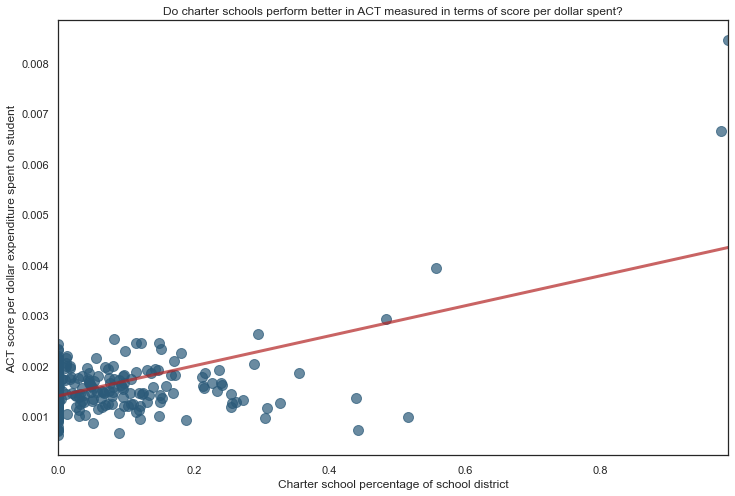

In [349]:
# Corr coef 
print("Correlation between charter school percentage and score per dollar spent: ", 
      school_district_merge_subset[['charter_school_percentage', 'act_average_composite_score_per_dollar_expenditure']].corr().iloc[1,0])

# Plotting charter school percentage vs expenditure per student
plt.figure(figsize = (12,8))

sns.regplot(x = school_district_merge_subset["charter_school_percentage"], y = school_district_merge_subset["act_average_composite_score_per_dollar_expenditure"], ci= None,
           scatter_kws = {'s':100, 'alpha': 0.7, 'color': "#2B5A79"},
           line_kws = {"linewidth": 3, 'color': 'firebrick', 'alpha': 0.7})
plt.xlabel("Charter school percentage of school district")
plt.ylabel("ACT score per dollar expenditure spent on student")
plt.title("Do charter schools perform better in ACT measured in terms of score per dollar spent?");

We see that charter schools actually make use of their expenditures more efficiently, when judged in terms of ACT score per dollar spent on student. This shows that simply increasing funding to schools is not a sure way to improve test performance.  

##### Do school districts with higher median household income perform better?

Another financial aspect which may influence test performance is the affluence of a students family background. A wealthier family could afford to provide more financial support to a student's academic development. 

Examining whether this is the case could guide decision makers in better allocating resources. Perhaps more funds should go to support lower income families, perhaps a more long term approach is to improve the overall financial well-being of the community.

From earlier analysis, median household income has a moderate positive correlation of 0.65 with SAT benchmark percentage. We will take a closer look on the pattern.

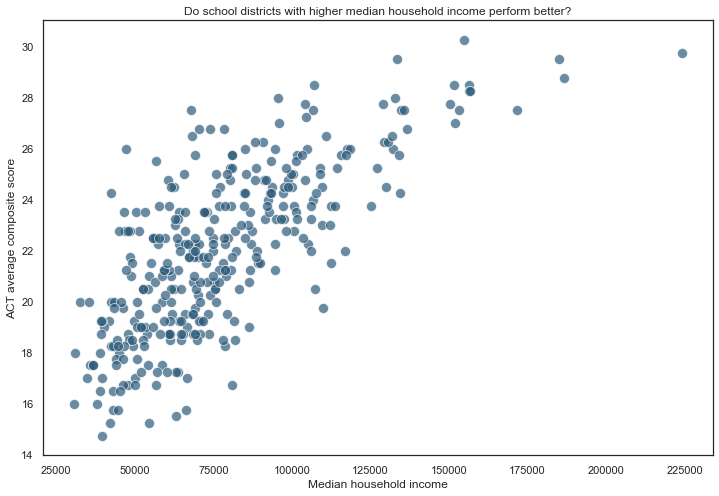

In [350]:
# Plot scatter plot of median household income 
plt.figure(figsize = (12,8))

sns.scatterplot(data = school_district_merge_subset, x = "median_household_income", y = "act_average_composite_score", color = "#2B5A79", s = 100, alpha = 0.7)
plt.xlabel("Median household income")
plt.ylabel("ACT average composite score")
plt.title("Do school districts with higher median household income perform better?");

The scatter plot shows a correlation between median household income of a school district and the SAT benchmark percentage. As per previous case, we will visualize the data again after grouping the income into different bins. 

Let us look at income in terms of different percentiles. We will group the the income by percentile.

In [351]:
# percentile info for rows with SAT benchmark percentage info
school_district_merge_subset_sat_benchmark = school_district_merge_subset[~school_district_merge_subset['sat_percentage_both_benchmark'].isnull()]
school_district_merge_subset_sat_benchmark['median_household_income'].describe()

count       394.000000
mean      76005.375635
std       28728.683261
min       22250.000000
25%       55971.750000
50%       70379.000000
75%       91057.250000
max      224205.000000
Name: median_household_income, dtype: float64

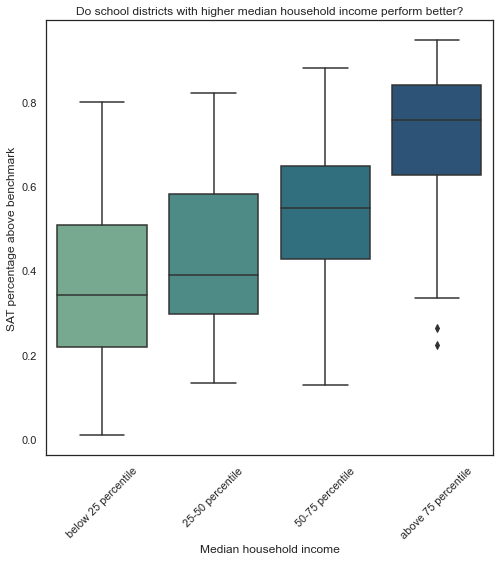

In [352]:
# Create 4 "bins" according to quantile - <25%, 25-50%, 50-75%, >75%
def hh_income_bins(row):
    if row["median_household_income"] < school_district_merge_subset['median_household_income'].quantile(0.25):
        row["household_income_level"] = "below 25 percentile"
    elif row["median_household_income"] >= school_district_merge_subset['median_household_income'].quantile(0.25) and row["median_household_income"] < school_district_merge_subset['median_household_income'].quantile(0.5):
        row["household_income_level"] = "25-50 percentile"
    elif row["median_household_income"] >= school_district_merge_subset['median_household_income'].quantile(0.5) and row["median_household_income"] < school_district_merge_subset['median_household_income'].quantile(0.75):
        row["household_income_level"] = "50-75 percentile"
    else:
        row["household_income_level"] = "above 75 percentile"
    return row

# Plot boxplot
plt.figure(figsize = (8,8))
sns.boxplot(data = school_district_merge_subset_sat_benchmark.apply(hh_income_bins, axis = 1), x = "household_income_level", y = "sat_percentage_both_benchmark", 
            order = ["below 25 percentile", "25-50 percentile", "50-75 percentile", "above 75 percentile"], palette = "crest")

plt.xticks(rotation = 45);
plt.xlabel("Median household income")
plt.ylabel("SAT percentage above benchmark");
plt.title("Do school districts with higher median household income perform better?");


Here we are dealt the cold hard truth that money does seem to buy results, to the extend that students from wealthier families does perform in general better than their less wealthy counterparts. The money effect is especially more obvious for the top 75th percentile of median household income, where its 25th percentile of SAT benchmark percentage is almost as good as the 75th percentile for districts one median house income bracket lower.

In case, you ask if schools in districts with wealthier family also spent more on students, the answer is... not really. Quite the opposite, poorer districts can actually spend more in terms of school expenditure per student.

So you can see that family's financial background does play a large role in students test performance. And this can be a problem, because it further reduces the social mobility in the society as the advantage snowballs. All the more important that we dedicate resources to create a level playing field for students!

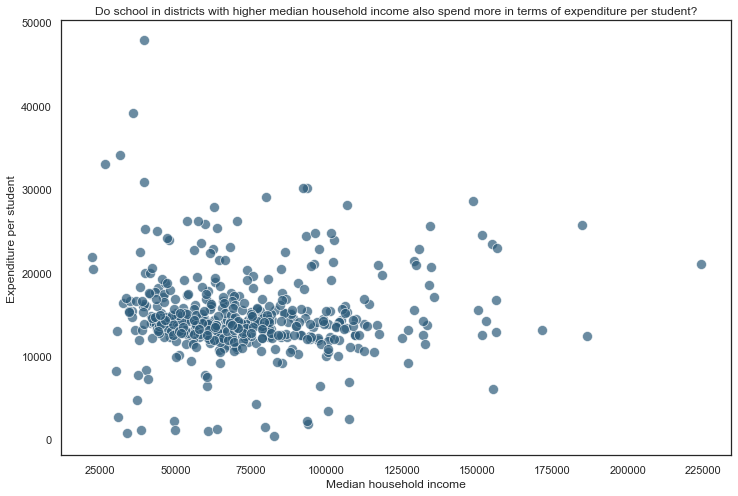

In [353]:
# Plot scatter plot of median household income vs expenditure per student
plt.figure(figsize = (12,8))

sns.scatterplot(data = school_district_merge_subset, x = "median_household_income", y = "expenditure_per_student", color = "#2B5A79", s = 100, alpha = 0.7)
plt.xlabel("Median household income")
plt.ylabel("Expenditure per student")
plt.title("Do school in districts with higher median household income also spend more in terms of expenditure per student?");

##### What other socio-factors might be correlated with both household income and test results?

Furthermore, as we see in many parts of the world, income disparity is often correlated with a series of deeper social divisions and inequality. To improve academic results at its root, we will need to identify these factors so as to provide more targeted recommendations. We shall explore these further.

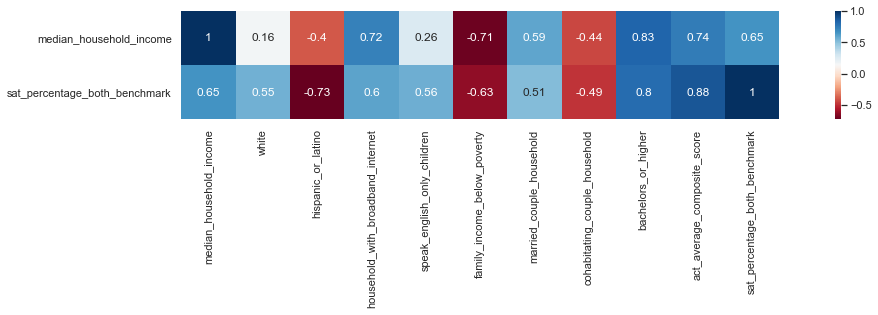

In [354]:
#sns.heatmap(corr.loc['median_household_income',corr_subset.index])
plt.figure(figsize = (20,2))
sns.heatmap(pd.DataFrame([corr.loc[corr_subset.index, 'median_household_income'].T, corr.loc[corr_subset.index, 'sat_percentage_both_benchmark'].T]), 
            square = True, annot = True, cmap = "RdBu")
plt.yticks(rotation = 0);

#### Do some ethinic groups do better than others?

We will first explore the disparity in test results among ethnic groups

##### Which are the better performing ethnic groups in terms of the overall score?

In [355]:
# First we will perform a melt on the races columns so that the values are on a single column.
# This is in preparation for the plotting
# We will use the ACT scores for this one since they represent actual scores (hence more incremental) instead of benchmark percentage used in SAT
races_col = ['white', 'black', 'hispanic_or_latino', 'asian','american_indian/alaskan_native', 'hawaiian_and_other_pacific_islander',
             'some_other_race_alone', 'two_or_more_races', 'median_household_income',
             "act_average_composite_score", "act_average_reading_score", "act_average_english_score", "act_average_math_score", "act_average_science_score"]
races = [race.replace("_", " ") for race in races_col][0:-1]
data_races = pd.melt(school_district_merge_subset[~school_district_merge_subset["act_average_composite_score"].isnull()][races_col], 
                     ["act_average_composite_score", 'act_average_reading_score', 'act_average_english_score', 'act_average_math_score', 'act_average_science_score', 'median_household_income'], 
                     var_name = 'races', value_name = 'percentage')
data_races.head()

act_average_composite_score  act_average_reading_score  \
0                        26.00                       27.0   
1                        27.00                       28.0   
2                        25.00                       26.0   
3                        25.25                       26.0   
4                        29.50                       29.0   

   act_average_english_score  act_average_math_score  \
0                       26.0                    26.0   
1                       27.0                    27.0   
2                       25.0                    25.0   
3                       25.0                    25.0   
4                       30.0                    30.0   

   act_average_science_score  median_household_income  races  percentage  
0                       25.0                 104756.0  white        0.43  
1                       26.0                  95783.0  white        0.44  
2                       24.0                  85444.0  white        0.53  
3                       25.0                 114277.0  white        0.47  
4                       29.0                 133339.0  white        0.20

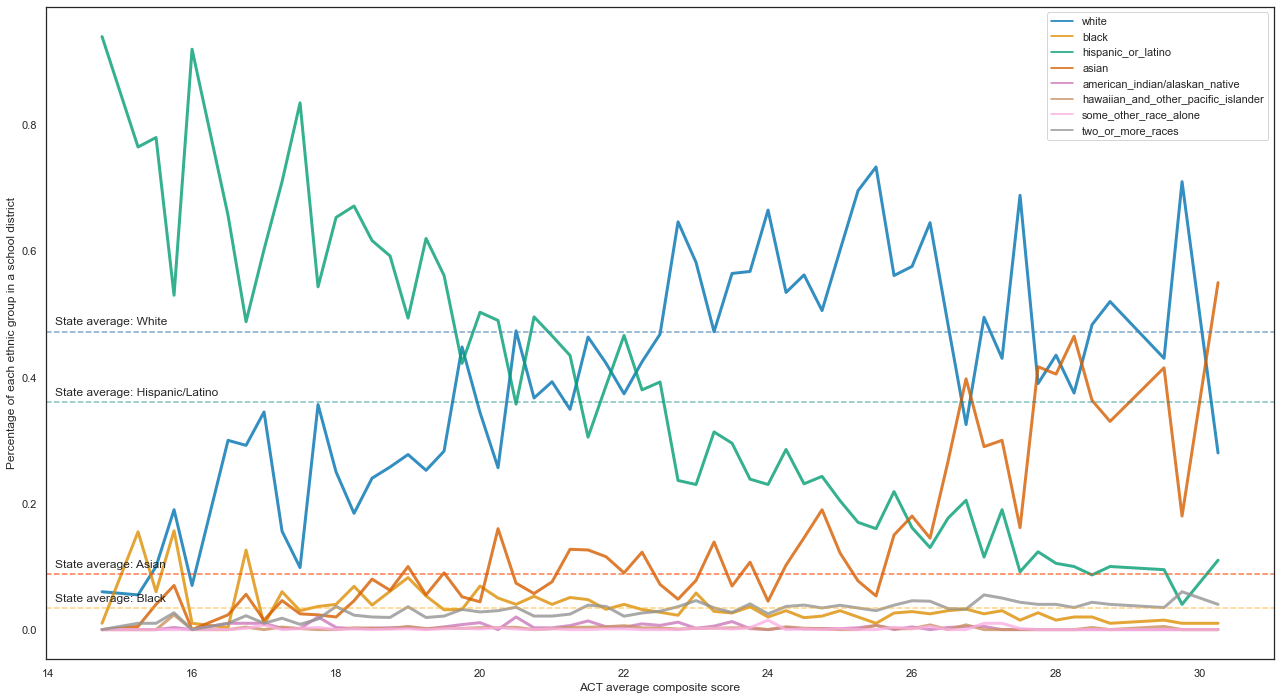

In [356]:
# Plotting the percentage of different races in a district against the average ACT composite score
fig, ax = plt.subplots(figsize = (22,12))
composite_line = sns.lineplot(data = data_races, x = "act_average_composite_score", y = "percentage", hue = 'races', linewidth = 3,
             alpha = 0.8, palette = "colorblind", err_style=None, ax = ax)

# averages ethnic group concentrations 
# White
composite_line.axhline(school_district_merge_subset['white'].mean(), ls = '--', c = 'steelblue', alpha = 0.7)
plt.text(14.1, school_district_merge_subset['white'].mean()+0.01,'State average: White')
# Black
composite_line.axhline(school_district_merge_subset['black'].mean(), ls = '--', c = 'orange', alpha = 0.5)
plt.text(14.1, school_district_merge_subset['black'].mean()+0.01,'State average: Black')
# Hispanic/Latino
composite_line.axhline(school_district_merge_subset['hispanic_or_latino'].mean(), ls = '--', c = 'teal', alpha = 0.5)
plt.text(14.1, school_district_merge_subset['hispanic_or_latino'].mean()+0.01,'State average: Hispanic/Latino')
# Asian
composite_line.axhline(school_district_merge_subset['asian'].mean(), ls = '--', c = 'orangered', alpha = 0.7)
plt.text(14.1, school_district_merge_subset['asian'].mean()+0.01,'State average: Asian')



plt.xlabel('ACT average composite score')
plt.ylabel('Percentage of each ethnic group in a school district');
plt.legend()

We see a few clear trends: 
* Districts with higher ACT composite score, also tend to have a disproportionately higher concentration of White Americans, but not by much
* Districts with average composite score above 26, tend to have a disproportionately higher concentration of White and Asian Americans, the effect is especially pronounced for Asian Americans
* Districts with higher composite score, tend to have a disproportionately lower concentration of Hispanic/Latino Americans
* Same goes for Black Americans, although the effect is less obvious than Hispanic/Latino Americans
* For other races, the concentration is too low to observe significant trend
* Overall, Asians are the best performing since at a higher level of ACT score, the Asian percentage deviates most from the state average, the reverse if true for Hispanic/Latino Americans

The trends suggest that there is inequity in terms of educational achievement along ethinc lines. 

If we take a look at the previous scatter plot of SAT benchmark against median household income, but with additional info for the majority race, we also see how educational and income inequity along ethnic lines are actually intertwined.

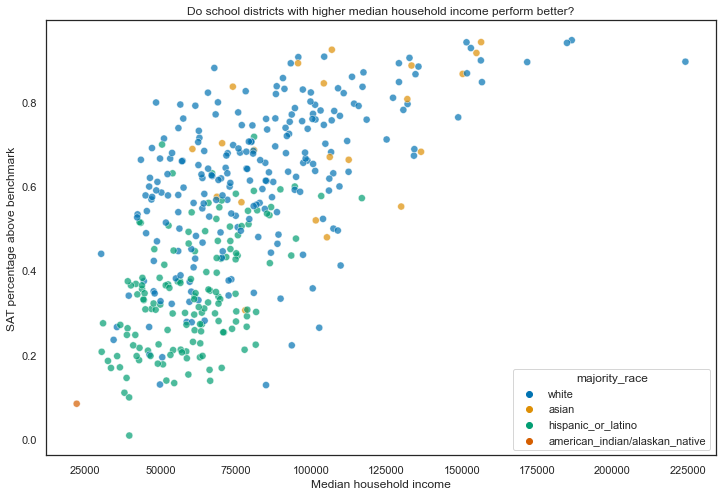

In [357]:
# Plot scatter plot of median household income vs SAT benchmark percentage
plt.figure(figsize = (12,8))

sns.scatterplot(data = school_district_merge_subset, x = "median_household_income", y = "sat_percentage_both_benchmark", 
                s = 50,  palette = "colorblind",hue = 'majority_race', alpha = 0.7)
plt.xlabel("Median household income")
plt.ylabel("SAT percentage above benchmark")
plt.title("Do school districts with higher median household income perform better?");

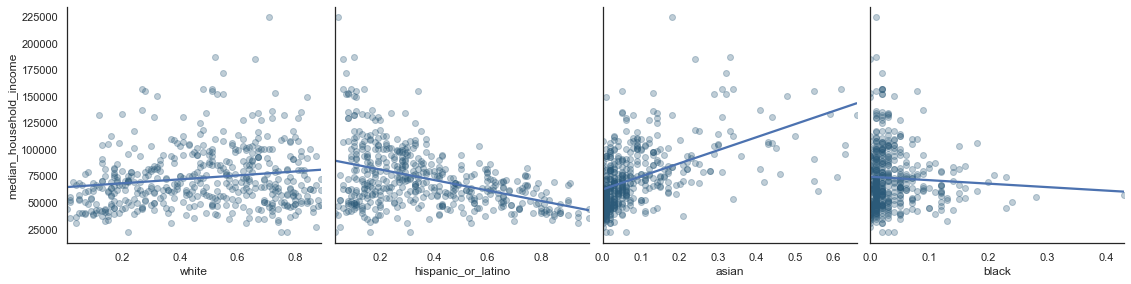

In [358]:
# Visualize median household income with different races
sns.pairplot(data = school_district_merge_subset,
             x_vars=["white", "hispanic_or_latino", "asian", "black"], 
             y_vars=["median_household_income"], 
            diag_kind=None, height=4, kind = 'reg',
            plot_kws = {"ci":None, 'scatter_kws': {"color":'#2B5A79', 'alpha' : 0.3}})

##### Are Asians better at Math?

Let us sidetrack a little to see if the popular notion that Asians are better at math and science holds true.

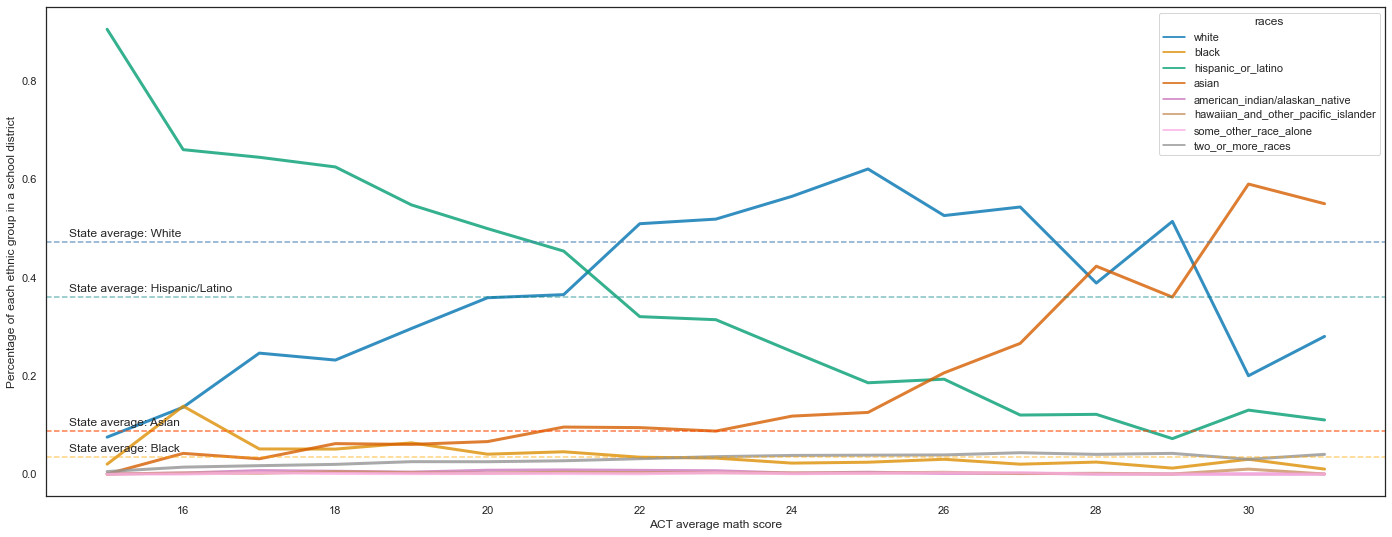

In [359]:
# Plotting the percentage of different races in a district against the average ACT math score
plt.figure(figsize = (24,9))
math_line = sns.lineplot(data = data_races, x = "act_average_math_score", y = "percentage", hue = 'races', linewidth = 3,
             alpha = 0.8, palette = "colorblind", err_style=None)

# averages ethnic group concentrations 
# White
math_line.axhline(school_district_merge_subset['white'].mean(), ls = '--', c = 'steelblue', alpha = 0.7)
plt.text(14.5, school_district_merge_subset['white'].mean()+0.01,'State average: White')
# Black
math_line.axhline(school_district_merge_subset['black'].mean(), ls = '--', c = 'orange', alpha = 0.5)
plt.text(14.5, school_district_merge_subset['black'].mean()+0.01,'State average: Black')
# Hispanic/Latino
math_line.axhline(school_district_merge_subset['hispanic_or_latino'].mean(), ls = '--', c = 'teal', alpha = 0.5)
plt.text(14.5, school_district_merge_subset['hispanic_or_latino'].mean()+0.01,'State average: Hispanic/Latino')
# Asian
math_line.axhline(school_district_merge_subset['asian'].mean(), ls = '--', c = 'orangered', alpha = 0.7)
plt.text(14.5, school_district_merge_subset['asian'].mean()+0.01,'State average: Asian')

plt.xlabel('ACT average math score')
plt.ylabel('Percentage of each ethnic group in a school district');

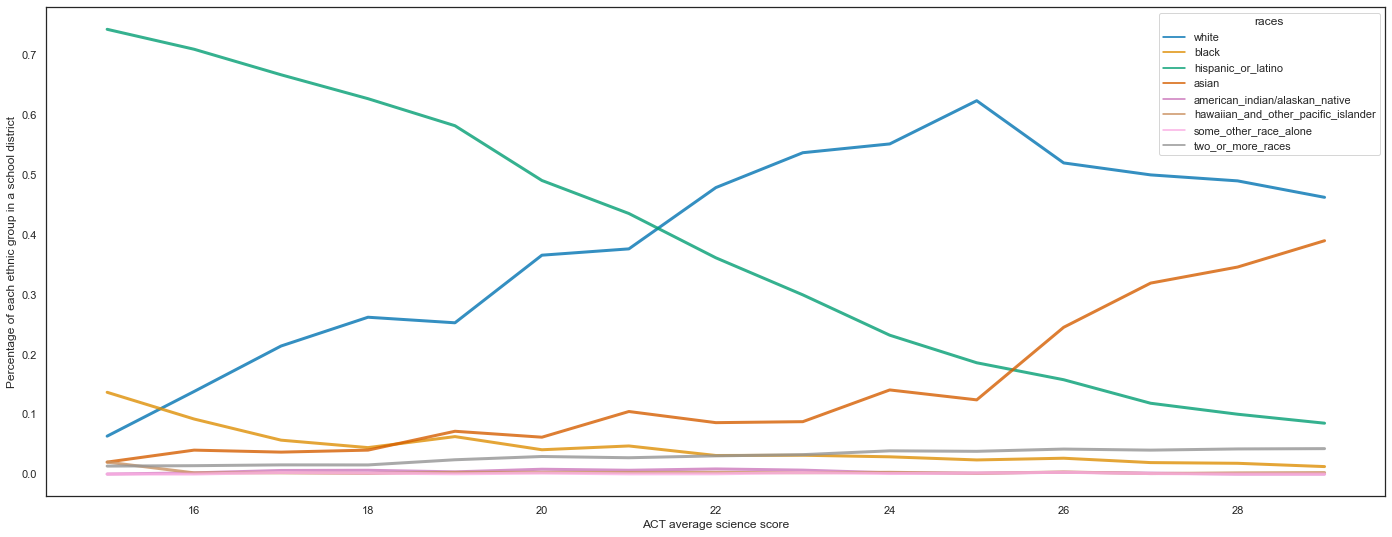

In [360]:
# Plotting the percentage of different races in a district against the average ACT science score
plt.figure(figsize = (24,9))
sns.lineplot(data = data_races, x = "act_average_science_score", y = "percentage", hue = 'races', linewidth = 3,
             alpha = 0.8, palette = "colorblind", err_style=None)
plt.xlabel('ACT average science score')
plt.ylabel('Percentage of each ethnic group in a school district');

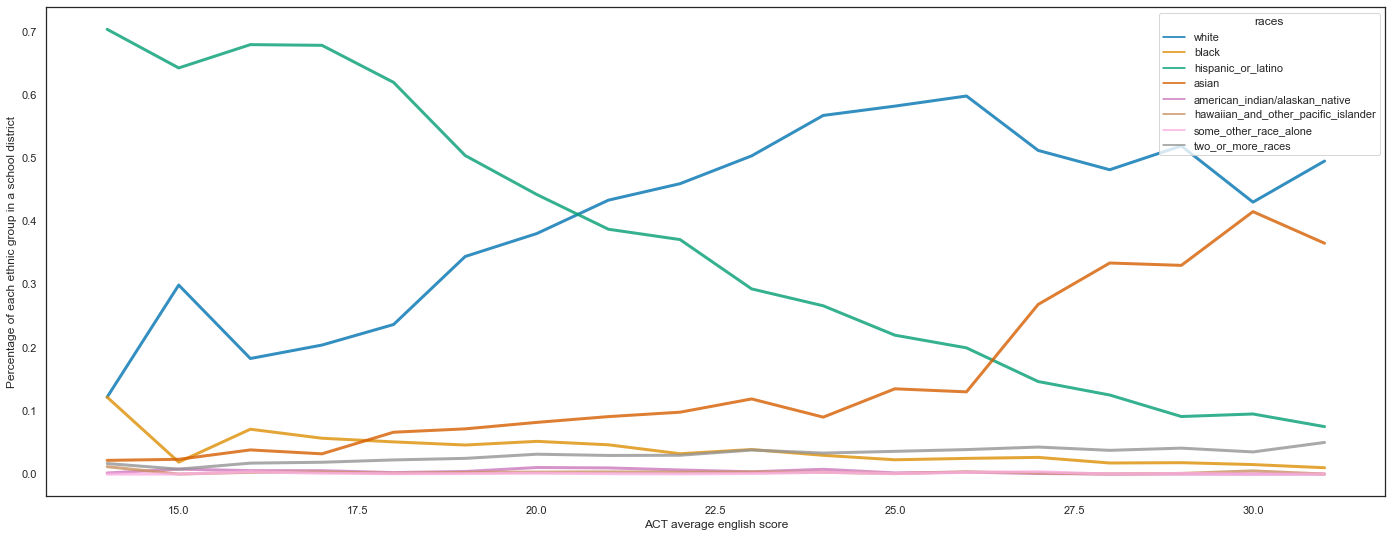

In [361]:
# Plotting the percentage of different races in a district against the average ACT english score
plt.figure(figsize = (24,9))
sns.lineplot(data = data_races, x = "act_average_english_score", y = "percentage", hue = 'races', linewidth = 3,
             alpha = 0.8, palette = "colorblind", err_style=None)
plt.xlabel('ACT average english score')
plt.ylabel('Percentage of each ethnic group in a school district');

Compared with english and science, Asians does seem to excel in math

##### Household with Broadband Internet

We also see that another factor that has >0.5 positive correlation with the tests results is the percentage of household access to broadband internet. We shall examine this factor more closely. 

<AxesSubplot:xlabel='household_with_broadband_internet', ylabel='Probability'>

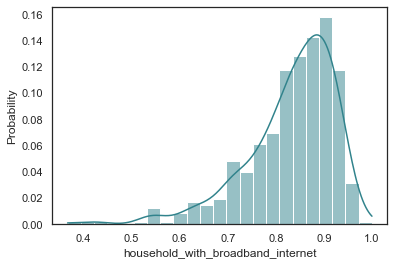

In [362]:
# Visualize using histogram
sns.histplot(school_district_merge_subset["household_with_broadband_internet"], color = "#31838C", kde = True, stat = 'probability')

We are seeing a normal distribution with a left skew, quite a higher concentration from the 0.8-0.9 range, while the minimum is in the 0.3-0.4 range. Next we will plot the broadband internet rate against the SAT benchmark percentage.

Text(0, 0.5, 'ACT average composite score')

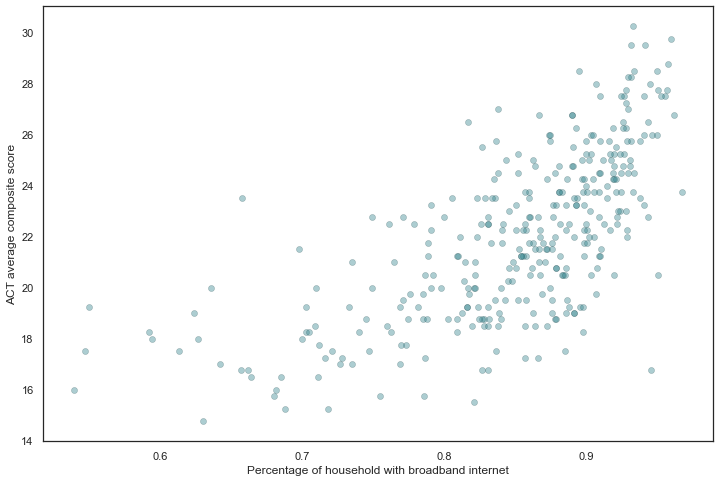

In [363]:
# Visualize percentage broadband access and SAT score
plt.figure(figsize = (12,8))
sns.scatterplot(data = school_district_merge_subset, x = 'household_with_broadband_internet', y = 'act_average_composite_score', 
                ec = '#154247', fc = "#31838C", alpha = 0.4)

plt.xlabel("Percentage of household with broadband internet")
plt.ylabel("ACT average composite score")



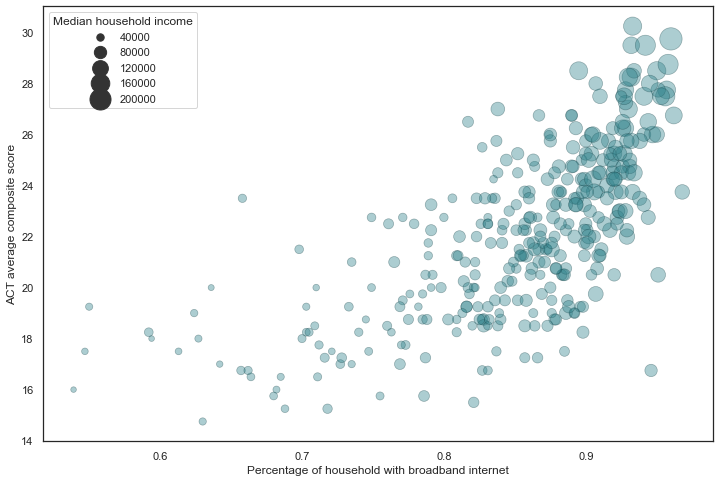

In [364]:
# Visualize percentage broadband access and SAT score, with 
plt.figure(figsize = (12,8))
sns.scatterplot(data = school_district_merge_subset, x = 'household_with_broadband_internet', y = 'act_average_composite_score', 
                size = 'median_household_income', sizes = (10,500), ec = '#154247', fc = "#31838C", alpha = 0.4)

plt.xlabel("Percentage of household with broadband internet")
plt.ylabel("ACT average composite score")
legend = plt.legend(loc = 'upper left');
legend.set_title("Median household income")


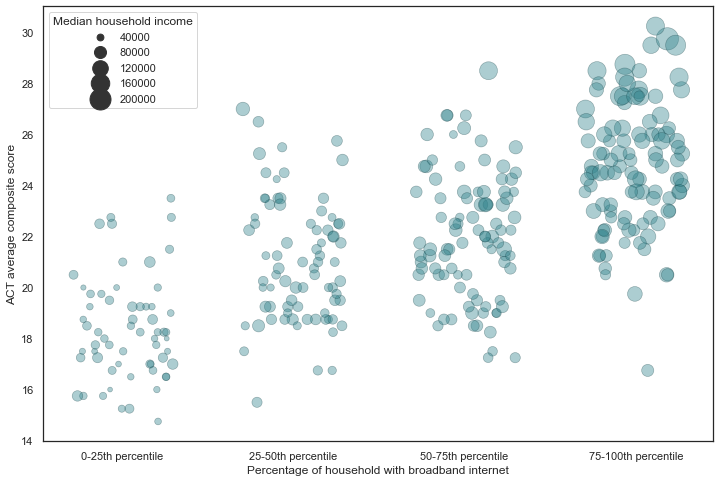

In [365]:
# Create 4 "bins" according to quantile - <25%, 25-50%, 50-75%, >75%
def broadband_bins(row):
    if row["household_with_broadband_internet"] < school_district_merge_subset['household_with_broadband_internet'].quantile(0.25):
        row["household_with_broadband_internet_percentile"] = 1 + np.random.uniform(-0.3,0.3)
    elif row["household_with_broadband_internet"] >= school_district_merge_subset['household_with_broadband_internet'].quantile(0.25) and row["household_with_broadband_internet"] < school_district_merge_subset['household_with_broadband_internet'].quantile(0.5):
        row["household_with_broadband_internet_percentile"] = 2+ np.random.uniform(-0.3,0.3)
    elif row["household_with_broadband_internet"] >= school_district_merge_subset['household_with_broadband_internet'].quantile(0.5) and row["household_with_broadband_internet"] < school_district_merge_subset['household_with_broadband_internet'].quantile(0.75):
        row["household_with_broadband_internet_percentile"] = 3+ np.random.uniform(-0.3,0.3)
    else:
        row["household_with_broadband_internet_percentile"] = 4+ np.random.uniform(-0.3,0.3)
    return row
        
school_district_merge_subset.apply(broadband_bins, axis =1)
# Visualize percentage broadband access and SAT score
plt.figure(figsize = (12,8))
sns.scatterplot(data = school_district_merge_subset.apply(broadband_bins, axis =1), x = 'household_with_broadband_internet_percentile', y = 'act_average_composite_score', 
                size = 'median_household_income', sizes = (1, 500), ec = '#154247', fc = "#31838C", alpha = 0.4)

plt.xlabel("Percentage of household with broadband internet")
plt.ylabel("ACT average composite score")
plt.xticks(ticks = [1,2,3,4], labels = ["0-25th percentile", "25-50th percentile", "50-75th percentile", "75-100th percentile"])
legend = plt.legend(loc = 'best');
legend.set_title("Median household income")


We see quite a clear positive releationship between percentage of household with broadband internet and the ACT score of the district. By also visualizing the median household income of the district as size of the bubble, we see that districts with lower percentage of households with internet are also typically those with lower median household income. 

In the information age, access to internet is almost equivalent to access to information. Raising income of an area is a long term process, but in the short term, we could provide subsidized internet service to lower income households in order to provide access to knowledge which is essential to improving results in standardized tests. 

In [366]:
school_district_merge_subset.head(0)

Empty DataFrame
Columns: [NCES_ID, CDCode, county_name, district_name, district_type, urban_locale, total_enrolment, charter_school_percentage, non_charter_school_percentage, homeless_student_percentage, migrant_student_percentage, dropout_percentage, suspension_percentage, total_population, median_household_income, total_household, white, black, hispanic_or_latino, asian, american_indian/alaskan_native, hawaiian_and_other_pacific_islander, some_other_race_alone, two_or_more_races, housing_structure_built_2000_and_after, housing_structure_built_1970-1999, housing_structure_built_before_1970, household_with_broadband_internet, housing_structure_type_house, housing_structure_type_apartment, speak_english_only_children, under18_with_disability, under18_with_health_insurance, family_income_below_poverty, married_couple_household, cohabitating_couple_household, female_householder_household, male_householder_household, parents_not_in_labor_force, bachelors_or_higher, expenditure_per_student, majority_race, white_majority, act_enroll, act_num_test_taker, act_participation_rate, act_average_reading_score, act_average_english_score, act_average_math_score, act_average_science_score, act_num_above_average_score, act_percentage_above_average_score, act_average_composite_score, sat_enroll, sat_num_test_taker, sat_participation_rate, sat_num_erw_benchmark, sat_percentage_erw_benchmark, sat_num_math_benchmark, sat_percentage_math_benchmark, sat_num_both_benchmark, sat_percentage_both_benchmark, act_average_composite_score_per_dollar_expenditure]
Index: []

##### Household type

In [367]:
# First we will perform a melt on the races columns so that the values are on a single column.
# This is in preparation for the plotting
# We will use the ACT scores for this one since they represent actual scores (hence more incremental) instead of benchmark percentage used in SAT
hh_type_col = ['married_couple_household', 'cohabitating_couple_household', 'female_householder_household', 'male_householder_household', 'median_household_income',
             "act_average_composite_score", "act_average_reading_score", "act_average_english_score", "act_average_math_score", "act_average_science_score"]
data_hh_type = pd.melt(school_district_merge_subset[~school_district_merge_subset["act_average_composite_score"].isnull()][hh_type_col], 
                     ["act_average_composite_score", 'act_average_reading_score', 'act_average_english_score', 'act_average_math_score', 'act_average_science_score', 'median_household_income'], 
                     var_name = 'household_type', value_name = 'percentage')
data_hh_type.tail()

act_average_composite_score  act_average_reading_score  \
1351                        27.50                       28.0   
1352                        20.00                       21.0   
1353                        19.50                       20.0   
1354                        19.00                       20.0   
1355                        21.75                       23.0   

      act_average_english_score  act_average_math_score  \
1351                       27.0                    28.0   
1352                       19.0                    20.0   
1353                       19.0                    19.0   
1354                       18.0                    19.0   
1355                       21.0                    21.0   

      act_average_science_score  median_household_income  \
1351                       27.0                  67918.0   
1352                       20.0                  70699.0   
1353                       20.0                  68687.0   
1354                       19.0                  51851.0   
1355                       22.0                  88694.0   

                  household_type  percentage  
1351  male_householder_household        0.05  
1352  male_householder_household        0.07  
1353  male_householder_household        0.06  
1354  male_householder_household        0.06  
1355  male_householder_household        0.03

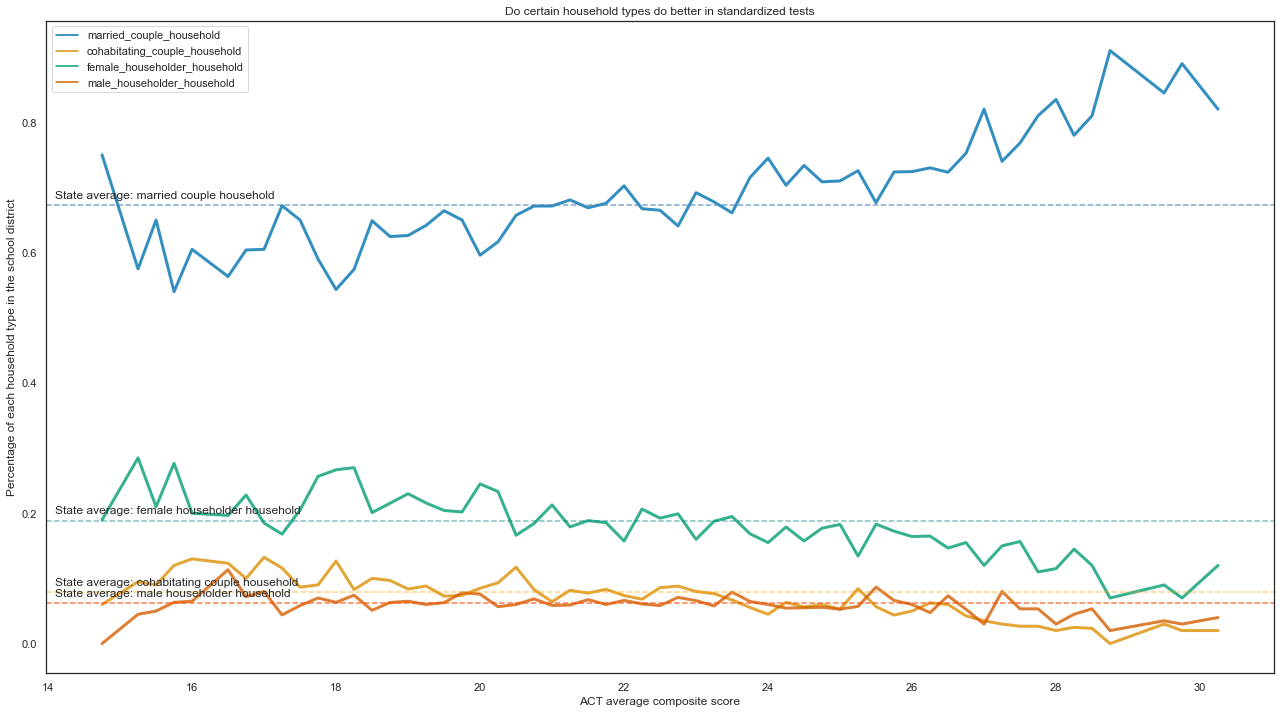

In [368]:
# Plotting the percentage of different household types in a district against the average ACT composite score
fig, ax = plt.subplots(figsize = (22,12))
composite_line = sns.lineplot(data = data_hh_type, x = "act_average_composite_score", y = "percentage", hue = 'household_type', linewidth = 3,
             alpha = 0.8, palette = "colorblind", err_style=None, estimator = 'mean')

# averages of household types 
# married_couple_household
composite_line.axhline(school_district_merge_subset['married_couple_household'].mean(), ls = '--', c = 'steelblue', alpha = 0.7)
plt.text(14.1, school_district_merge_subset['married_couple_household'].mean()+0.01,'State average: married couple household')
# cohabitating_couple_household
composite_line.axhline(school_district_merge_subset['cohabitating_couple_household'].mean(), ls = '--', c = 'orange', alpha = 0.5)
plt.text(14.1, school_district_merge_subset['cohabitating_couple_household'].mean()+0.01,'State average: cohabitating couple household')
# female_householder_household
composite_line.axhline(school_district_merge_subset['female_householder_household'].mean(), ls = '--', c = 'teal', alpha = 0.5)
plt.text(14.1, school_district_merge_subset['female_householder_household'].mean()+0.01,'State average: female householder household')
# male_householder_household
composite_line.axhline(school_district_merge_subset['male_householder_household'].mean(), ls = '--', c = 'orangered', alpha = 0.7)
plt.text(14.1, school_district_merge_subset['male_householder_household'].mean()+0.01,'State average: male householder household')

plt.title("Do certain household types do better in standardized tests")
plt.xlabel('ACT average composite score')
plt.ylabel('Percentage of each household type in the school district');
plt.legend()

##### Parents education level

The education level of parents should be correlated with the median household income and also broadband access, lets visualize the broadband access graph but with information for household income and parents education level.

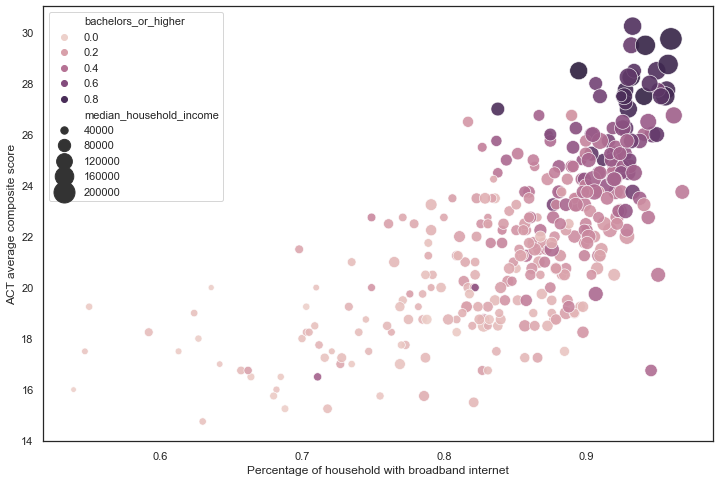

In [369]:
# Visualize percentage broadband access and SAT score
plt.figure(figsize = (12,8))
sns.scatterplot(data = school_district_merge_subset, x = 'household_with_broadband_internet', y = 'act_average_composite_score', 
                size = 'median_household_income', sizes = (10,500), alpha = 0.9, hue = "bachelors_or_higher")

plt.xlabel("Percentage of household with broadband internet")
plt.ylabel("ACT average composite score")
legend = plt.legend(loc = 'upper left');


By visualizing the same graph with additional information, we can see how the 3 variables are interrelated and their relationship with the ACT score.

We can further investigate the reason why parents with higher education level might have done differently in their children's education, perhaps things like better academic and career advice might help, but that is a topic for another day.

##### Geographical distribution

We will also attempt to visualize the distribution of participation rate and benchmarks in terms of geographical distribution of school districts, to see if there are obvious geographical patterns which influences the test scores.

In [370]:
# Read shp file of california school districts
calfornia_gdf = gpd.read_file("../data/GIS/DistrictAreas1819.shp")

# concat with attributes from the full pandas dataframe containing the test and socio-demographic info
calfornia_gdf = pd.concat([calfornia_gdf[["DistrictNa", "geometry"]], school_district_merge_full], axis = 1).drop("DistrictNa", axis = 1)

calfornia_gdf.tail(2)

geometry  NCES_ID   CDCode  \
942  POLYGON ((-13500775.523 4754748.024, -13500775...   642330  5872751   
943  POLYGON ((-13503989.762 4753344.067, -13503964...   642350  5872769   

    county_name         district_name district_type        urban_locale  \
942        Yuba             Wheatland    Elementary   31 - Town, Fringe   
943        Yuba  Wheatland Union High          High  41 - Rural, Fringe   

     total_enrolment  charter_school_percentage  \
942             1388                   0.070605   
943              784                   0.000000   

     non_charter_school_percentage  homeless_student_percentage  \
942                       0.929395                        0.012   
943                       1.000000                        0.009   

     migrant_student_percentage  dropout_percentage  suspension_percentage  \
942                       0.001                 NaN                  0.029   
943                       0.000                0.15                  0.073   

     Unnamed: 0  total_population  median_household_income  total_household  \
942         942            7563.0                  72473.0           2525.0   
943         943           15588.0                  88694.0           4916.0   

     white  black  hispanic_or_latino  asian  american_indian/alaskan_native  \
942   0.72   0.02                0.15   0.03                            0.01   
943   0.65   0.03                0.19   0.05                            0.01   

     hawaiian_and_other_pacific_islander  some_other_race_alone  \
942                                 0.01                    0.0   
943                                 0.01                    0.0   

     two_or_more_races  housing_structure_built_2000_and_after  \
942               0.06                                   0.342   
943               0.07                                   0.583   

     housing_structure_built_1970-1999  housing_structure_built_before_1970  \
942                              0.427                                0.232   
943                              0.280                                0.138   

     household_with_broadband_internet  housing_structure_type_house  \
942                              0.861                         0.851   
943                              0.901                         0.916   

     housing_structure_type_apartment  speak_english_only_children  \
942                             0.149                        0.927   
943                             0.084                        0.908   

     under18_with_disability  under18_with_health_insurance  \
942                    0.051                          0.961   
943                    0.013                          0.914   

     family_income_below_poverty  married_couple_household  \
942                        0.059                      0.74   
943                        0.083                      0.74   

     cohabitating_couple_household  female_householder_household  \
942                           0.07                          0.12   
943                           0.09                          0.14   

     male_householder_household  parents_not_in_labor_force  \
942                        0.07                       0.227   
943                        0.03                       0.282   

     bachelors_or_higher  expenditure_per_student majority_race  \
942                0.212                  13336.0         white   
943                0.267                  15561.0         white   

    white_majority  act_enroll  act_num_test_taker  act_participation_rate  \
942            yes         NaN                 NaN                     NaN   
943            yes       167.0                18.0                0.107784   

     act_average_reading_score  act_average_english_score  \
942                        NaN                        NaN   
943                       23.0                       21.0   

     act_average_math_score  act_average_science_score  \
942

In [371]:
#calfornia_gdf.to_csv("../data/merged_df.csv")

In [372]:
# Import major california cities
import fiona 

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
major_cal_cities_gdf = gpd.read_file('../data/GIS/california_major_cities.kml', driver='KML')
major_cal_cities_gdf.to_crs(crs = "EPSG:3857", inplace = True)
major_cal_cities_gdf.crs 


<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We will visualize the geographical distribution of urbanisation in California.

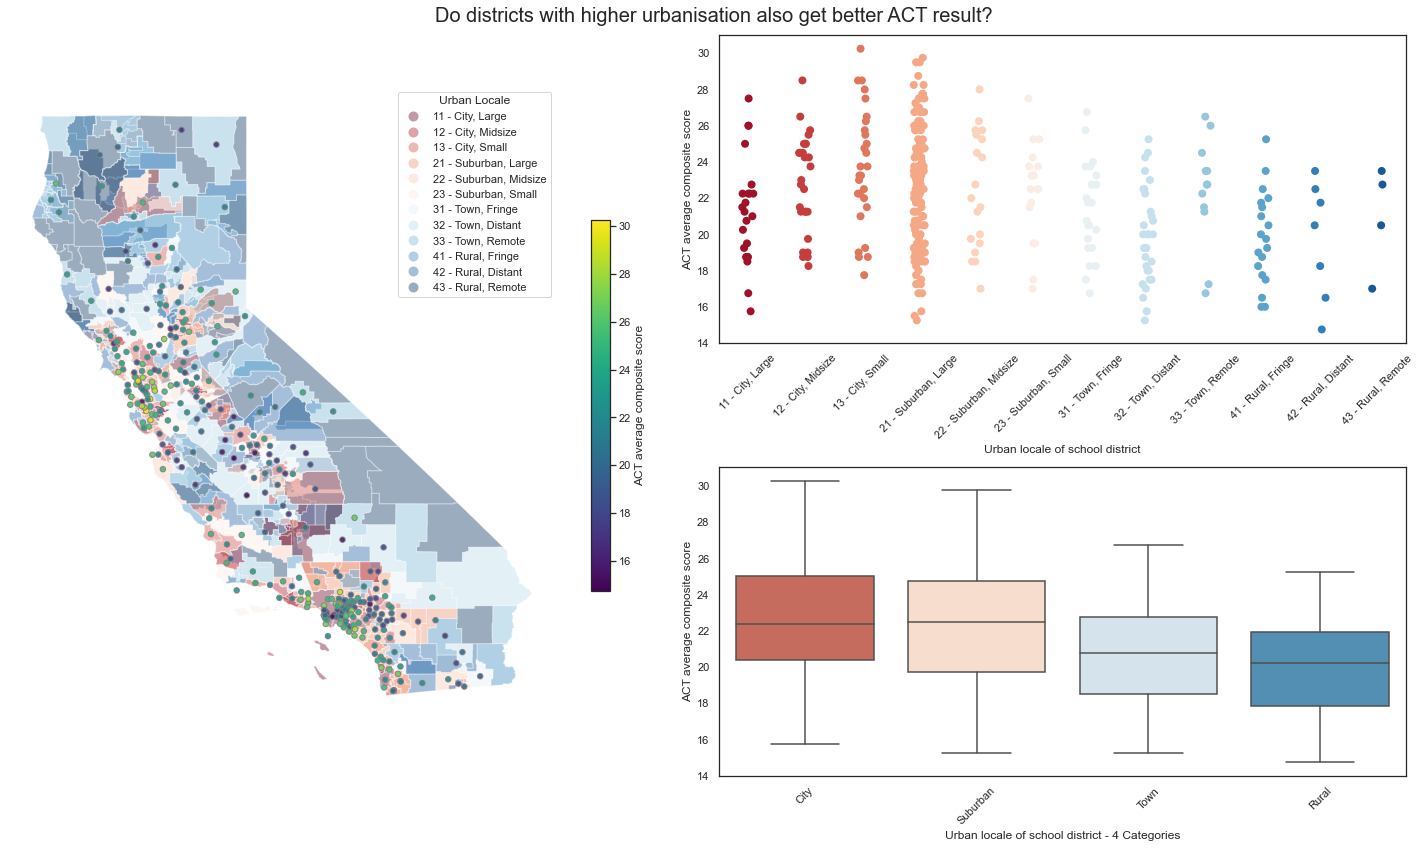

In [373]:
# Visualizing on map
plt.figure(figsize = (20,12))
plt.suptitle("Do districts with higher urbanisation also get better ACT result?", fontsize = 20);

## Plot map
# Plot choropleth map
ax1 = plt.subplot(121) 

calfornia_gdf.plot("urban_locale", legend = True, k = 10,cmap = "RdBu", alpha = 0.4, ax = ax1, legend_kwds={'title': "Urban Locale"})
plt.axis('off');

# plot centroids of each district
centroids = calfornia_gdf.copy()
centroids.geometry = calfornia_gdf.centroid
centroids['size'] = centroids['act_average_composite_score'] * 30
centroids.plot(column = 'act_average_composite_score', markersize = 30, ax = ax1, alpha =0.9, cmap = 'viridis', ec = 'grey',
               legend = True, legend_kwds={'label':"ACT average composite score", 'shrink' :0.5})


## Plot right strip plot
ax2 = plt.subplot(222) 
sns.stripplot(data = school_district_merge_subset, x = "urban_locale", y = "act_average_composite_score", 
            palette = "RdBu", s = 8, ax = ax2)

plt.xticks(rotation = 45);
plt.ylabel("ACT average composite score")
plt.xlabel("Urban locale of school district");


# plot bottom right boxplot
def urban_bins(row):
    if 'City' in row["urban_locale"]:
        row["urban_local_broad"] = "City"
    elif 'Suburban' in row["urban_locale"]:
        row["urban_local_broad"] = "Suburban"
    elif 'Town' in row["urban_locale"]:
        row["urban_local_broad"] = "Town"
    else:
        row["urban_local_broad"] = "Rural"
    return row

## Plot boxplot for coaser grain urban locale
ax3 = plt.subplot(224) 
sns.boxplot(data = school_district_merge_subset.apply(urban_bins, axis = 1), x = "urban_local_broad", y = "act_average_composite_score", 
            palette = "RdBu", order = ['City', 'Suburban', 'Town', 'Rural'], ax = ax3)

plt.xticks(rotation = 45);
plt.ylabel("ACT average composite score")
plt.xlabel("Urban locale of school district - 4 Categories");

plt.tight_layout()

#major_cal_cities_gdf.plot(ax = ax1, color = "green", markersize = 50, alpha = 0.5, edgecolor = 'black', linewidth = 3)

Seems like many of the cities and suburban areas are concentrated along the western coast, in fact, the two coastal clusters are San Francisco and Los Angeles. 

Upon exmaination, these districts are more likely to obtain higher ACT scores. In general, districts within cities and suburbs are more likely to obtain higher ACT score than towns and rural area, costal cities are more likely to obtain higher score than inland cities. 

And of course, there are income disparities between districts as well.

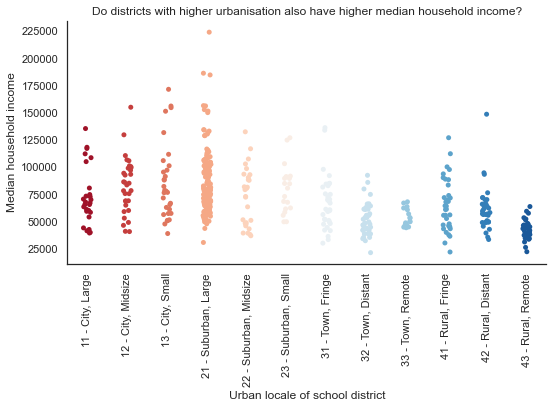

In [374]:
# Plot boxplot
sns.catplot(data = school_district_merge_subset, x = "urban_locale", y = "median_household_income", palette = "RdBu",
           height = 4, aspect = 2)

plt.xticks(rotation = 90);
plt.xlabel("Urban locale of school district")
plt.ylabel("Median household income");
plt.title("Do districts with higher urbanisation also have higher median household income?");


We will also visualize the geographical distribution of SAT participation rate. Similar to the ACT score, the SAT participation rate also tend to be higher in coastal cities.

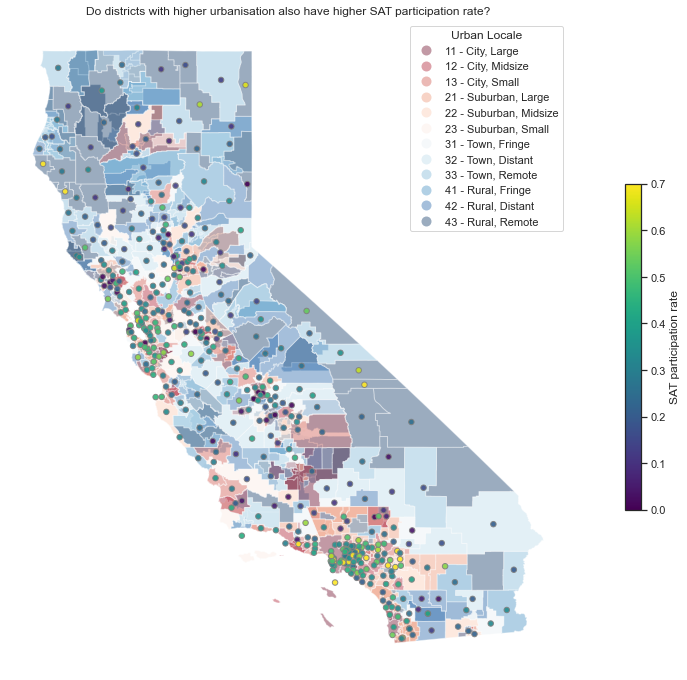

In [375]:
# Visualizing SAT participation rate

fig, ax = plt.subplots(figsize = (20,12))
plt.title("Do districts with higher urbanisation also have higher SAT participation rate?");

## Plot map
# Plot choropleth map
calfornia_gdf.plot("urban_locale", legend = True, k = 10,cmap = "RdBu", alpha = 0.4, 
                   legend_kwds={'title': "Urban Locale"}, ax = ax)
plt.axis('off');

# plot centroids of each district
centroids = calfornia_gdf.copy()
centroids.geometry = calfornia_gdf.centroid
centroids['size'] = centroids['sat_participation_rate'] * 30
centroids.plot(column = 'sat_participation_rate', markersize = 30,alpha =0.9, cmap = 'viridis', ec = 'grey',
               legend = True, legend_kwds={'label':"SAT participation rate", 'shrink' :0.5}, ax = ax, vmax = 0.7);

## Conclusions and Recommendations

Key Takeaways and Recommendations
1. Increasing education expenditure per student may only be useful in improving standardized test score to an extend, above 10,000 USD per student, the effect becomes less apparent

2. From the experience of charter schools, we see that these schools are able to get better results with less expenditure per dollar spent, which further reinforce the notion that expenditure is limited in effectiveness and there is a dimishing marginal return of education expenditure

3. We see that median household income of a district is more highly correlated with standardidized test results, help should focus on lower income households in order to create a level playing field for students

4. We have also identified a few areas where there is both a disparity in income and disparity in standardized test result
    - Ethnic groups: We see that as the percentage of White Americans and especially Asian Americans in a district increases, standardized test result and median income also tend to be higher, the inverse is true for Hispanic/Latino Americans and Black Americans
        - More help should be focused on Hispanic/Latino as well as Black Americans
        - A separate research can be conducted to investigate what Asian American families are doing right to achieve higher standardized score
    - Broadband access: Districts with a higher broadband access also tend to have higher test results, the authorities could consider providing subsidized broadband services in order to create access to information and knowledge. 
    - Household type: When a student comes from married household, they are more likely to score better in standardized tests as compared to those from cohabiting and single parent households, more work can be done to find out what non-married household student needs, such as after school care and tuition
    - Parent's education: Students with parents who achieve at least a bachelor's degree are more likely to do better than those who do not, similarly more work should be done to identify needs of these groups of students, and help be given to services such as career guidance services
    - Urban locale: We also identified geographical disparity in test results, where districts in coastal cities and suburbs tend to do better than inland towns and rural areas. this finding points to areas where more help can be targeted.
    
The analysis allowed us to have a glimpse into the socio-economic division underlying the disparity in tests scores. As unversity admission is still an important pathway to social mobility, it is crucial that the underlying divisions are addressed, so that standardized tests do not perpetuate the existing division in the society. 